# DSE 315/615 - Multilingual Abusive Comment Detection for Indian Languages

### Name: Mayur Mankar
### Roll No: 20169
### Department: Data Science & Engineering
### Course: Data Science in Practice, August - December 2022

# Overview

The goal of our project was to:
<br>
1) Prepare transformer-based methods to identify the offensive texts from multilingual (Hindi, Tamil, Malayalam, Kannada, Telugu) code-mixed data.
<br>
2) Perform experiments on the dataset with detail performance and error analysis, thus setting an important baseline to compare in future.

<a id='research_question'></a>
# Research Question

The aim is to implement a system that can successfully detect code-mixed offensive texts.

<a id='background'></a>

## Background & Prior Work

Offensive social media content might trigger objectionable consequences to its user like mental health problem, and suicide attempts (Bonanno and Hymel, 2013). To keep the social media ecosystem, coherent researchers and stakeholders should try to develop computational models to identify and classify offensive contents within a short period. Zampieri et al. (2019a) develop an offensive language identification dataset using hierarchical annotation schema. Three layers of annotation are used in the dataset: offensive language detection, arXiv:2103.00455v1 [cs.CL] 28 Feb 2021 categorization of offensive language, and offensive language target identification. SemEval task 6 is organized based on this dataset which had opened interesting research directions (Zampieri et al., 2019b). In early stages, computational models created by using support vector machine, naive Bayes and other traditional machine learning approach (Dadvar et al., 2013). These models performance is not up to the mark as they could not capture the semantic and contextual information in texts. This problem was mitigated with the arrival of word embeddings and recurrent
neural networks (Aroyehun and Gelbukh, 2018). Networks like bidirectional LSTMs and GRUs can hold contextual information from both past and future, creating more robust classification systems (Mandl et al., 2019). In recent years,
transformer-based model such as BERT (Sharif et al., 2021), XLM-R (Ranasinghe and Zampieri, 2020) gained more attention to identify and classify offensive texts. These large pre-trained model can classify code-mixed texts of different languages with astonishing accuracy (Hande et al., 2020; Chakravarthi et al., 2020).

References:

- 1)https://openreview.net/pdf?id=HCnb1TByvx7


# Hypothesis


Transformer-based model such as BERT and XLM-R show better results as compared to traditional machine learning models in the context of detection of multilingual abusive comments.

# Datasets

**Dataset Name:** Multilingual Abusive Comments from Twitter<br>
**Number of observations:** Hindi: 33000 comments (52% ABUSIVE), Tamil: 30000 comments (46% ABUSIVE), Telugu: 30000 comments (52% ABUSIVE), Malayalam: 25000 comments (49% ABUSIVE), Kaannada: 33000 (45% ABUSIVE)<br>
**Description of the dataset:** Dataset contains the training, validation and test split in csv format for all the languages included with MACD - Hindi, Tamil, Telugu, Malayalam and Kannada.

# Setup

## Libraries

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

CPU times: user 23.8 ms, sys: 5.88 ms, total: 29.7 ms
Wall time: 29.8 ms


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Hindi Dataset

Importing the test, validation and test data of marathi code-mix comments

In [ ]:
%%time
train_data = pd.read_csv("/content/hindi_train.csv")
valid_data = pd.read_csv("/content/hindi_val.csv")
test_data = pd.read_csv("/content/hindi_test.csv")

CPU times: user 116 ms, sys: 19.9 ms, total: 136 ms
Wall time: 137 ms


Print the data

In [ ]:
print(train_data)
print(valid_data)
print(test_data)

       label                                               text
0          0                      भीड़ में  बहुत  हब्सी मिलेंगे
1          0          साले बेवकूफ अपनी मां मक्खियां  तो हटा दें
2          0                   बुर देदो तो मुह में लंड ले लो तो
3          0               कुत्ता वहा है चिल्ला तू क्यों रहा है
4          1          चाय नहीं पीता हूं मैं इसी को छोड़ दिया ok
...      ...                                                ...
20178      0             और छोटे भी क्यु पहनते हो, कहा जरूरत है
20179      1             कैसी हो सोना क्या आप हमसे दोस्ती करोगी
20180      1          इस से ये पता चलता है अब चुनाव आ रहा है🙄🙄🙄
20181      1                    खेत जोते हुए किसान भैंस के साथो
20182      0  काश आगर यह इतना दिमाग पढाई में लगायें तो शायद ...

[20183 rows x 2 columns]
      label                                               text
0         0                          Comment box चालू कर झवाडे
1         0  आपके पास पुख्ता सबूत है, क्या या फिर कुछ भी। उ...
2         1  👬दोस

In [ ]:
train_data['label'].value_counts()

0    10527
1     9656
Name: label, dtype: int64

In [ ]:
valid_data['label'].value_counts()

0    3464
1    3264
Name: label, dtype: int64

In [ ]:
train_data['enc_label'] = train_data['label']
valid_data['enc_label'] = valid_data['label']

In [ ]:

train_data

,label,text,enc_label
0,0,भीड़ में बहुत हब्सी मिलेंगे,0
1,0,साले बेवकूफ अपनी मां मक्खियां तो हटा दें,0
2,0,बुर देदो तो मुह में लंड ले लो तो,0
3,0,कुत्ता वहा है चिल्ला तू क्यों रहा है,0
4,1,चाय नहीं पीता हूं मैं इसी को छोड़ दिया ok,1
...,...,...,...
20178,0,"और छोटे भी क्यु पहनते हो, कहा जरूरत है",0
20179,1,कैसी हो सोना क्या आप हमसे दोस्ती करोगी,1
20180,1,इस से ये पता चलता है अब चुनाव आ रहा है🙄🙄🙄,1
20181,1,खेत जोते हुए किसान भैंस के साथो,1


In [ ]:
train_data['text'].tolist()

['भीड़ में  बहुत  हब्सी मिलेंगे',
 'साले बेवकूफ अपनी मां मक्खियां  तो हटा दें',
 'बुर देदो तो मुह में लंड ले लो तो',
 'कुत्ता वहा है चिल्ला तू क्यों रहा है',
 'चाय नहीं पीता हूं मैं इसी को छोड़ दिया ok',
 'बैंकों से सरकार का रिश्ता दलाली का है, बड़े बड़े चोरों को लोन दिलाने के एवज में बैंक से भी दलाली लेते है और बड़े लोग से भी',
 '#पगली 😍 हम तो #बहोत 😎 _शोकीन हैं 👸👈 #तुजे डोली🎠 मे बिठाके 👫 लेके #जाते, पर 👸👈 तेरे 👗 #कपड़े और 💃 #स्टाईल 👀 देखके 👩 मां केहेगी 😋 #हरामखोर 😍👈 तुझे 👸 _बहु लाने के लिए कहा था 👰 #Heroine ❌ नहीं !!',
 'ohh my god . यहां इतने सारे चमचे इसका मतलब जलनखोरो की कमी नही है',
 'आप मेरे कमेंट का इतना  इंतजार क्यों करते है',
 'भोसड़ी को बात करने दो',
 'आप बहुत प्यारे हो सनम',
 'हमें   परमात्मा की   भक्ति   करनी    चाहिए   नहीं तो   गधी   बनोगी    sat   saheb  ji🙏🙏',
 'ये बीजेपी वाले बहुत चूतिया है',
 'तुम्हारे पीछे पड़े हैं  बहुत सारे नमूने हैं   किसी का तो फ्रेंड रिक्वेस्ट एक्सेप्ट कर लो😂😂😂😂🤣😂😀😀😀😁😁',
 'तेरि माँ किचुत सालि',
 'सुपर वेरी गुड काला चश्मा',
 'सूचियां इतनी सेक्सी 

In [ ]:
print("Size of the training data ==> ", train_data.shape)
print("Size of the validation data ==>", valid_data.shape)
print("Size of the Test data ==>", test_data.shape)

Size of the training data ==>  (20183, 3)
Size of the validation data ==> (6728, 3)
Size of the Test data ==> (6728, 2)


## One Hot Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(train_data[['label']]))
encoded_labels .columns = encoder.get_feature_names(['label'])
train_data= pd.concat([train_data, encoded_labels ], axis=1)

In [ ]:
train_data.columns

Index(['label', 'text', 'enc_label', 'label_0', 'label_1'], dtype='object')

In [ ]:
train_data

,label,text,enc_label,label_0,label_1
0,0,भीड़ में बहुत हब्सी मिलेंगे,0,1.0,0.0
1,0,साले बेवकूफ अपनी मां मक्खियां तो हटा दें,0,1.0,0.0
2,0,बुर देदो तो मुह में लंड ले लो तो,0,1.0,0.0
3,0,कुत्ता वहा है चिल्ला तू क्यों रहा है,0,1.0,0.0
4,1,चाय नहीं पीता हूं मैं इसी को छोड़ दिया ok,1,0.0,1.0
...,...,...,...,...,...
20178,0,"और छोटे भी क्यु पहनते हो, कहा जरूरत है",0,1.0,0.0
20179,1,कैसी हो सोना क्या आप हमसे दोस्ती करोगी,1,0.0,1.0
20180,1,इस से ये पता चलता है अब चुनाव आ रहा है🙄🙄🙄,1,0.0,1.0
20181,1,खेत जोते हुए किसान भैंस के साथो,1,0.0,1.0


In [ ]:
train_data = train_data.rename(columns={'label_0':'Non_Abusive','label_1':'Abusive'})
train_data

,label,text,enc_label,Non_Abusive,Abusive
0,0,भीड़ में बहुत हब्सी मिलेंगे,0,1.0,0.0
1,0,साले बेवकूफ अपनी मां मक्खियां तो हटा दें,0,1.0,0.0
2,0,बुर देदो तो मुह में लंड ले लो तो,0,1.0,0.0
3,0,कुत्ता वहा है चिल्ला तू क्यों रहा है,0,1.0,0.0
4,1,चाय नहीं पीता हूं मैं इसी को छोड़ दिया ok,1,0.0,1.0
...,...,...,...,...,...
20178,0,"और छोटे भी क्यु पहनते हो, कहा जरूरत है",0,1.0,0.0
20179,1,कैसी हो सोना क्या आप हमसे दोस्ती करोगी,1,0.0,1.0
20180,1,इस से ये पता चलता है अब चुनाव आ रहा है🙄🙄🙄,1,0.0,1.0
20181,1,खेत जोते हुए किसान भैंस के साथो,1,0.0,1.0


## Cleaning

Cleaning comments to remove special characters and URLs

In [ ]:
'''
Text Cleaning
'''
def text_cleaning(row):
  # to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = post.replace('—', ' ')
  # to remove accented characters
  new_text = unicodedata.normalize('NFKD', post).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  # to remove special characters and numbers
  # define the pattern to keep
  #pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
  #text = re.sub(pat, '', new_text)
  #to remove punctuation
  text = ''.join([c for c in text if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower() 
  # Stopword Removing
  tokenizer = ToktokTokenizer()
  # convert sentence into token of words
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]

  return text

In [ ]:
#removing URLs and Punctuations
#train_data['cleaned'] = train_data['tweet'].apply(remove_url)
#Removing punctuations
train_data['cleaned'] = train_data['text'].apply(text_cleaning)
valid_data['cleaned'] = valid_data['text'].apply(text_cleaning)
test_data['cleaned'] = test_data['text'].apply(text_cleaning)

## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(10):
  print("Original Data:===\n",train_data.text[i],"\nCleaned Data:===\n",train_data.cleaned[i],)

Data samples after cleaning:

Original Data:===
 भीड़ में  बहुत  हब्सी मिलेंगे 
Cleaned Data:===
 भीड़ में बहुत हब्सी मिलेंगे
Original Data:===
 साले बेवकूफ अपनी मां मक्खियां  तो हटा दें 
Cleaned Data:===
 साले बेवकूफ अपनी मां मक्खियां तो हटा दें
Original Data:===
 बुर देदो तो मुह में लंड ले लो तो 
Cleaned Data:===
 बुर देदो तो मुह में लंड ले लो तो
Original Data:===
 कुत्ता वहा है चिल्ला तू क्यों रहा है 
Cleaned Data:===
 कुत्ता वहा है चिल्ला तू क्यों रहा है
Original Data:===
 चाय नहीं पीता हूं मैं इसी को छोड़ दिया ok 
Cleaned Data:===
 चाय नहीं पीता हूं मैं इसी को छोड़ दिया ok
Original Data:===
 बैंकों से सरकार का रिश्ता दलाली का है, बड़े बड़े चोरों को लोन दिलाने के एवज में बैंक से भी दलाली लेते है और बड़े लोग से भी 
Cleaned Data:===
 बैंकों से सरकार का रिश्ता दलाली का है बड़े बड़े चोरों को लोन दिलाने के एवज में बैंक से भी दलाली लेते है और बड़े लोग से भी
Original Data:===
 #पगली 😍 हम तो #बहोत 😎 _शोकीन हैं 👸👈 #तुजे डोली🎠 मे बिठाके 👫 लेके #जाते, पर 👸👈 तेरे 👗 #कपड़े और 💃 #स्टाईल 👀 देखके 👩

In [ ]:
valid_data['cleaned'].shape

(6728,)

## Data Statistics

In [ ]:
def char_length(row):
    return len(row.split())

In [ ]:
train_data.columns

Index(['label', 'text', 'enc_label', 'Non_Abusive', 'Abusive', 'cleaned'], dtype='object')

In [ ]:
lables = ['Non_Abusive','Abusive']

# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1.0].cleaned) for word in t.strip().split()]
    print(f"\nClass Name:--> {l} ") 
    print("Number of Words:{}".format(len(word_list))) 
    print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
    print("Maximum post length: {}".format(max(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1.0].cleaned.apply(char_length))))

In [ ]:
dataset_statistics(train_data)


Class Name:--> Non_Abusive 
Number of Words:174210
Number of Unique Words:20818
Maximum post length: 263
Average Words in texts: 16.548874323168995

Class Name:--> Abusive 
Number of Words:153817
Number of Unique Words:20835
Maximum post length: 285
Average Words in texts: 15.929681027340514


## Tweets length per class

In [ ]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['Non_Abusive','Abusive']]
  label = label.values
  comment = dataset['cleaned']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix].split())
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
  labelsplt = ['Non_Abusive','Abusive']
  color = ['red','green']    
  bins = [1,5]   
  plt.figure(figsize=(5,3)) 
  #plt.title ('Tweets Length Distribution Per Class')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 10, 0, 4000])
  plt.xlabel('Length of texts')
  plt.ylabel('Number of texts') 
  plt.legend()
  #plt.savefig(path+'real-fake_no_title.png',dpi = 600,bbox_inches ='tight')
  #plt.grid(True)
  plt.show()

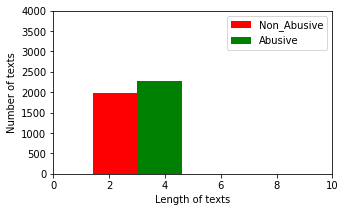

In [ ]:
comments_length_per_class(train_data,'Training')

##Ktrain -BERT


Applying BERT model

In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 89.7 MB/s 
     |████████████████████████████████| 981 kB 60.3 MB/s 
     |████████████████████████████████| 263 kB 71.3 MB/s 
     |████████████████████████████████| 3.8 MB 60.2 MB/s 
     |████████████████████████████████| 1.3 MB 59.3 MB/s 
     |████████████████████████████████| 468 kB 67.2 MB/s 
     |████████████████████████████████| 880 kB 61.0 MB/s 
     |████████████████████████████████| 182 kB 67.9 MB/s 
     |████████████████████████████████| 7.6 MB 63.3 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.10-py3-none-any.whl size=25312982 sha256=b34a474d078599ac8e7f18a9196b28f2866eb8013888464e3abdf1855719c0d7
  Stored in directory: /root/.cache/pip/wheels/9c/1c/1b/6df2db85720b8f5c6ea5e3ae37313cfc656f248abf910b7cfd
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33516 sha256=00f734219972d08a1cd743

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ktrain
from ktrain import text

In [ ]:

train_data['label'].value_counts()

0    10527
1     9656
Name: label, dtype: int64

In [ ]:
valid_data['label'].value_counts()

0    3464
1    3264
Name: label, dtype: int64

In [ ]:
categories = ['Non_Abusive','Abusive']

In [ ]:
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

X_valid = valid_data['text'].tolist()
y_valid = valid_data['label'].tolist()

X_test = test_data['text'].tolist()
#y_test = test_data['label'].tolist()

In [ ]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_valid,y_valid)
#test = trans.preprocess_test(X_test,y_test)

preprocessing train...
language: hi
train sequence lengths:
	mean : 16
	95percentile : 45
	99percentile : 95


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: hi
test sequence lengths:
	mean : 16
	95percentile : 47
	99percentile : 99


In [ ]:
model = trans.get_classifier()

Downloading:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
1681/1681 [==============================] - 333s 165ms/step - loss: 0.6775 - accuracy: 0.5806
Epoch 2/10
1681/1681 [==============================] - 267s 159ms/step - loss: 0.5244 - accuracy: 0.7388
Epoch 3/10
1681/1681 [==============================] - 266s 158ms/step - loss: 0.4258 - accuracy: 0.7995
Epoch 4/10
1681/1681 [==============================] - 265s 158ms/step - loss: 0.5211 - accuracy: 0.7063
Epoch 5/10
1681/1681 [==============================] - 264s 157ms/step - loss: 0.7018 - accuracy: 0.5050
Epoch 6/10
1681/1681 [==============================] - 264s 157ms/step - loss: 0.7669 - accuracy: 0.5044
Epoch 7/10
1681/1681 [==============================] - 159s 94ms/step - loss: 1.5421 - accuracy: 0.4987


done.
Visually inspect loss plot and select learning rate associated with falling loss


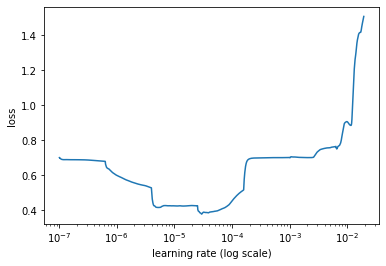

In [ ]:
learner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = "balanced",classes = np.unique(train_data['label']),y = train_data['label'])
weight = {i : class_weights[i] for i in range(2)}
weight

{0: 0.9586301890377126, 1: 1.0451014913007457}

In [ ]:
learner.validate(class_names=categories)

211/211 [==============================] - 26s 111ms/step
              precision    recall  f1-score   support

 Non_Abusive       0.53      0.97      0.68      3464
     Abusive       0.71      0.08      0.14      3264

    accuracy                           0.54      6728
   macro avg       0.62      0.52      0.41      6728
weighted avg       0.61      0.54      0.42      6728



array([[3357,  107],
       [3005,  259]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [ ]:
# Save and load the model
predictor.save('hi_offensive_m-bert_cw_predictor')

In [ ]:
predictor = ktrain.load_predictor('hi_offensive_m-bert_cw_predictor')

In [ ]:
y_pred = predictor.predict(X_test)
y_pred

211/211 [==============================] - 26s 111ms/step


['Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',
 'Non_Abusive',


In [ ]:
test_data['id'] = test_data.index+1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = y_pred
run

,id,text,label
0,1,मैं ये नही सोच रहा की इसे निकले कैसे मैं ये सो...,Non_Abusive
1,2,और दिवाली में भी पूरा देश पड़ाका नहीं फोडात,Non_Abusive
2,3,कुत्ता बिल्ली पाल लेना मगर गलत फहमी कभी नहीं।,Non_Abusive
3,4,तेरी गांड में प्याज काट देगा गुज्जर भोसड़ी के,Non_Abusive
4,5,बंगाली साड़ी ऐसे नहीं पहना जाता है दीदी,Non_Abusive
...,...,...,...
6723,6724,आरे पागल लवडे कुछ तो समज आये वो कर ना,Non_Abusive
6724,6725,शेर नज़र अंदाज़ कर रहे हैं। इसे कमजोरी मत समझ ले...,Non_Abusive
6725,6726,लाल चड्डी के अंदर भी लाल ही होगा,Non_Abusive
6726,6727,कैसे है आप,Non_Abusive


In [ ]:
run['label'].value_counts()

Non_Abusive    6359
Abusive         369
Name: label, dtype: int64

In [ ]:
run.to_csv('hindi_off_indic-bert_cw.csv',index = False)

##Machine Learning

Applying machine learning techiques

In [ ]:
def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

In [ ]:
## TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
#use_idf=True,tokenizer=lambda x: x.split()
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
vectorised_posts = vectorizer.fit_transform(train_data['cleaned'])
vectorized_train_posts = vectorizer.transform(train_data['cleaned'])
vectorized_valid_posts = vectorizer.transform(valid_data['cleaned'])
vectorized_test_posts = vectorizer.transform(test_data['cleaned'])

print("Feature Size: ", vectorized_train_posts.shape[1])
#vectorizer.vocabulary_

Feature Size:  33955


In [ ]:
vectorized_valid_posts.shape

(6728, 33955)

In [ ]:
labels = ['Non_Abusive','Abusive']
def actual_label(row):
    return labels[row]

###LR

Logistic Regression

In [ ]:
# After Tunning
# Optimum C = 100 
lr = LogisticRegression(C=10,class_weight='balanced')
lr.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = lr.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

[[2846  545]
 [ 618 2719]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3391
           1       0.83      0.81      0.82      3337

    accuracy                           0.83      6728
   macro avg       0.83      0.83      0.83      6728
weighted avg       0.83      0.83      0.83      6728

Accuracy :  0.827140309155767
Precison :  0.8272643638811953
Recall :  0.827140309155767
F1 :  0.8271048928611993


In [ ]:
test_pred = lr.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,मैं ये नही सोच रहा की इसे निकले कैसे मैं ये सो...,Abusive
1,2,और दिवाली में भी पूरा देश पड़ाका नहीं फोडात,Abusive
2,3,कुत्ता बिल्ली पाल लेना मगर गलत फहमी कभी नहीं।,Non_Abusive
3,4,तेरी गांड में प्याज काट देगा गुज्जर भोसड़ी के,Non_Abusive
4,5,बंगाली साड़ी ऐसे नहीं पहना जाता है दीदी,Abusive
...,...,...,...
6723,6724,आरे पागल लवडे कुछ तो समज आये वो कर ना,Non_Abusive
6724,6725,शेर नज़र अंदाज़ कर रहे हैं। इसे कमजोरी मत समझ ले...,Non_Abusive
6725,6726,लाल चड्डी के अंदर भी लाल ही होगा,Non_Abusive
6726,6727,कैसे है आप,Abusive


In [ ]:
run.to_csv('hindi_off_lr.csv',index = False)

###SVM

Support Vector Machine

In [ ]:
## SVM
from sklearn.svm import SVC
svc =  SVC(kernel='linear',C = 5,random_state=1234,class_weight='balanced')
svc.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = svc.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

[[2792  603]
 [ 672 2661]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3395
           1       0.82      0.80      0.81      3333

    accuracy                           0.81      6728
   macro avg       0.81      0.81      0.81      6728
weighted avg       0.81      0.81      0.81      6728

Accuracy :  0.8104934601664685
Precison :  0.8105883529497984
Recall :  0.8104934601664685
F1 :  0.8104556039417099


In [ ]:
test_pred = svc.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,मैं ये नही सोच रहा की इसे निकले कैसे मैं ये सो...,Abusive
1,2,और दिवाली में भी पूरा देश पड़ाका नहीं फोडात,Abusive
2,3,कुत्ता बिल्ली पाल लेना मगर गलत फहमी कभी नहीं।,Non_Abusive
3,4,तेरी गांड में प्याज काट देगा गुज्जर भोसड़ी के,Non_Abusive
4,5,बंगाली साड़ी ऐसे नहीं पहना जाता है दीदी,Abusive
...,...,...,...
6723,6724,आरे पागल लवडे कुछ तो समज आये वो कर ना,Non_Abusive
6724,6725,शेर नज़र अंदाज़ कर रहे हैं। इसे कमजोरी मत समझ ले...,Non_Abusive
6725,6726,लाल चड्डी के अंदर भी लाल ही होगा,Non_Abusive
6726,6727,कैसे है आप,Abusive


In [ ]:
run.to_csv('hindi_off_svm.csv',index = False)

### Ensemble Appraoch (Majority Voting)

In [ ]:
LogReg_clf = LogisticRegression(class_weight='balanced')
DTree_clf = DecisionTreeClassifier(class_weight='balanced')
rt_clf =   RandomForestClassifier(class_weight='balanced')
SVC_clf = SVC(class_weight='balanced')

voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf),('RF', rt_clf)], voting='hard')
voting_clf.fit(vectorized_train_posts, train_data['enc_label'])
preds = voting_clf.predict(vectorized_valid_posts)

In [ ]:
print_metrices(valid_data['enc_label'],preds)

[[2957  507]
 [ 762 2502]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      3464
           1       0.83      0.77      0.80      3264

    accuracy                           0.81      6728
   macro avg       0.81      0.81      0.81      6728
weighted avg       0.81      0.81      0.81      6728

Accuracy :  0.8113852556480381
Precison :  0.8127648356735381
Recall :  0.8113852556480381
F1 :  0.8108995802973616


In [ ]:

test_pred = voting_clf.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,मैं ये नही सोच रहा की इसे निकले कैसे मैं ये सो...,Abusive
1,2,और दिवाली में भी पूरा देश पड़ाका नहीं फोडात,Non_Abusive
2,3,कुत्ता बिल्ली पाल लेना मगर गलत फहमी कभी नहीं।,Abusive
3,4,तेरी गांड में प्याज काट देगा गुज्जर भोसड़ी के,Non_Abusive
4,5,बंगाली साड़ी ऐसे नहीं पहना जाता है दीदी,Abusive
...,...,...,...
6723,6724,आरे पागल लवडे कुछ तो समज आये वो कर ना,Non_Abusive
6724,6725,शेर नज़र अंदाज़ कर रहे हैं। इसे कमजोरी मत समझ ले...,Non_Abusive
6725,6726,लाल चड्डी के अंदर भी लाल ही होगा,Non_Abusive
6726,6727,कैसे है आप,Abusive


In [ ]:
run.to_csv('hindi_off_voting.csv',index = False)

##Deep Learning

Applying Deep Learning techniques

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
print("Tensorflow Version:--",tf.version.VERSION)
print("Keras Version:---",keras.__version__)

Tensorflow Version:-- 2.11.0
Keras Version:--- 2.11.0


###Tokenization

In [ ]:
tokenizer = Tokenizer(num_words = 20000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', split=' ', char_level=False, oov_token='<oov>', document_count=0)
tokenizer.fit_on_texts(train_data['text'])  
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [ ]:
print(vocab_size)

33270


In [ ]:
max_len = 50
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(valid_data['text'])
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

33269
Number of Training Sequences : (20183, 50)
Number of Validation Sequences : (6728, 50)


In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

Number of Test Sequences : (6728, 50)


In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(train_data['enc_label']),y = train_data['enc_label'])

weight = {i : class_weights[i] for i in range(2)}

In [ ]:
weight

{0: 0.9586301890377126, 1: 1.0451014913007457}

In [ ]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "hi_off_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 100, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 100,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(6 , activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           3327000   
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          160800    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 6)                 60006     
                                                                 
Total params: 3,547,806
Trainable params: 3,547,806
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=15,
    batch_size = 64,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

Epoch 1/15
253/253 [==============================] - ETA: 0s - loss: 0.5343 - accuracy: 0.7187
Epoch 1: val_accuracy improved from -inf to 0.80902, saving model to hi_off_BiLSTMModel.h5
253/253 [==============================] - 36s 120ms/step - loss: 0.5343 - accuracy: 0.7187 - val_loss: 0.4150 - val_accuracy: 0.8090
Epoch 2/15
253/253 [==============================] - ETA: 0s - loss: 0.3015 - accuracy: 0.8758
Epoch 2: val_accuracy did not improve from 0.80902
253/253 [==============================] - 10s 41ms/step - loss: 0.3015 - accuracy: 0.8758 - val_loss: 0.4604 - val_accuracy: 0.8060
Epoch 3/15
253/253 [==============================] - ETA: 0s - loss: 0.2097 - accuracy: 0.9169
Epoch 3: val_accuracy did not improve from 0.80902
253/253 [==============================] - 6s 25ms/step - loss: 0.2097 - accuracy: 0.9169 - val_loss: 0.4511 - val_accuracy: 0.8033
Epoch 4/15
253/253 [==============================] - ETA: 0s - loss: 0.1439 - accuracy: 0.9462
Epoch 4: val_accuracy di

In [ ]:
# Load the saved model
model = load_model('hi_off_BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)

print("F1-Score:",f1_score(valid_data['enc_label'],y_pred,average = 'weighted')*100)
print("Accuracy:",accuracy_score(valid_data['enc_label'],y_pred)*100)

211/211 [==============================] - 1s 4ms/step
F1-Score: 81.16787305840376
Accuracy: 81.18311533888229


In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
print_metrices(valid_data['enc_label'],y_pred)

[[2673  791]
 [ 475 2789]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      3464
           1       0.78      0.85      0.82      3264

    accuracy                           0.81      6728
   macro avg       0.81      0.81      0.81      6728
weighted avg       0.82      0.81      0.81      6728

Accuracy :  0.8118311533888228
Precison :  0.8151217366806626
Recall :  0.8118311533888228
F1 :  0.8116787305840376


### Test Set Prediction

In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()
test_pred

211/211 [==============================] - 2s 11ms/step


6728

In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,मैं ये नही सोच रहा की इसे निकले कैसे मैं ये सो...,Abusive
1,2,और दिवाली में भी पूरा देश पड़ाका नहीं फोडात,Abusive
2,3,कुत्ता बिल्ली पाल लेना मगर गलत फहमी कभी नहीं।,Non_Abusive
3,4,तेरी गांड में प्याज काट देगा गुज्जर भोसड़ी के,Non_Abusive
4,5,बंगाली साड़ी ऐसे नहीं पहना जाता है दीदी,Non_Abusive
...,...,...,...
6723,6724,आरे पागल लवडे कुछ तो समज आये वो कर ना,Non_Abusive
6724,6725,शेर नज़र अंदाज़ कर रहे हैं। इसे कमजोरी मत समझ ले...,Non_Abusive
6725,6726,लाल चड्डी के अंदर भी लाल ही होगा,Non_Abusive
6726,6727,कैसे है आप,Abusive


In [ ]:
run.to_csv('hindi_bilstm.csv',index = False)

##Pretrained Embedding

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ta.300.vec.gz'))

In [ ]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = vocab_and_vectors.get(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

###Model Definition

In [ ]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "prt_hi-off-BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300,weights=[embedding_matrix],trainable=False, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 200,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(6 , activation='softmax')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 300)           9981000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 400)          801600    
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 20000)             0         
                                                                 
 dense_1 (Dense)             (None, 6)                 120006    
                                                                 
Total params: 10,902,606
Trainable params: 921,606
Non-trainable params: 9,981,000
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=50,
    batch_size = 64,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

Epoch 1/50
250/253 [============================>.] - ETA: 0s - loss: 0.7132 - accuracy: 0.5349
Epoch 1: val_accuracy improved from -inf to 0.54347, saving model to prt_hi-off-BiLSTMModel.h5
253/253 [==============================] - 9s 19ms/step - loss: 0.7131 - accuracy: 0.5347 - val_loss: 0.6867 - val_accuracy: 0.5435
Epoch 2/50
253/253 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.5645
Epoch 2: val_accuracy improved from 0.54347 to 0.57914, saving model to prt_hi-off-BiLSTMModel.h5
253/253 [==============================] - 3s 13ms/step - loss: 0.6819 - accuracy: 0.5645 - val_loss: 0.6755 - val_accuracy: 0.5791
Epoch 3/50
251/253 [============================>.] - ETA: 0s - loss: 0.6701 - accuracy: 0.5880
Epoch 3: val_accuracy improved from 0.57914 to 0.61605, saving model to prt_hi-off-BiLSTMModel.h5
253/253 [==============================] - 4s 17ms/step - loss: 0.6701 - accuracy: 0.5879 - val_loss: 0.6582 - val_accuracy: 0.6161
Epoch 4/50
252/253 [=====

In [ ]:
# Load the saved model
model = load_model('prt_hi-off-BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)
print_metrices(y_pred,valid_data['enc_label'])


211/211 [==============================] - 1s 4ms/step
[[2248 1226]
 [1216 2038]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      3474
           1       0.62      0.63      0.63      3254

    accuracy                           0.64      6728
   macro avg       0.64      0.64      0.64      6728
weighted avg       0.64      0.64      0.64      6728

Accuracy :  0.6370392390011891
Precison :  0.6370757632047088
Recall :  0.6370392390011891
F1 :  0.6370560940618517


In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()
test_pred

211/211 [==============================] - 2s 11ms/step


6728

In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,मैं ये नही सोच रहा की इसे निकले कैसे मैं ये सो...,Abusive
1,2,और दिवाली में भी पूरा देश पड़ाका नहीं फोडात,Abusive
2,3,कुत्ता बिल्ली पाल लेना मगर गलत फहमी कभी नहीं।,Abusive
3,4,तेरी गांड में प्याज काट देगा गुज्जर भोसड़ी के,Abusive
4,5,बंगाली साड़ी ऐसे नहीं पहना जाता है दीदी,Abusive
...,...,...,...
6723,6724,आरे पागल लवडे कुछ तो समज आये वो कर ना,Abusive
6724,6725,शेर नज़र अंदाज़ कर रहे हैं। इसे कमजोरी मत समझ ले...,Abusive
6725,6726,लाल चड्डी के अंदर भी लाल ही होगा,Abusive
6726,6727,कैसे है आप,Abusive


In [ ]:
run.to_csv('hindi_cnn+bilstm+fasttext.csv',index = False)

##Attention

Applying attention based models

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Add, BatchNormalization, Activation, Dropout

In [ ]:
MAX_FEATURES = 10000
EMBED_SIZE = 128
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_data['cleaned'])
list_tokenized_train = tokenizer.texts_to_sequences(train_data['cleaned'])
list_tokenized_val = tokenizer.texts_to_sequences(valid_data['cleaned'])  
list_tokenized_test = tokenizer.texts_to_sequences(test_data['cleaned'])  
RNN_CELL_SIZE = 100
  
MAX_LEN = 200  
X_train = pad_sequences(list_tokenized_train, maxlen=MAX_LEN)
y_train = train_data['enc_label']
X_val = pad_sequences(list_tokenized_val, maxlen=MAX_LEN)
y_val = valid_data['enc_label']
X_test = pad_sequences(list_tokenized_test, maxlen=MAX_LEN)

In [ ]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
          
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
          
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [ ]:
sequence_input = Input(shape=(MAX_LEN,), dtype="int32")
embedded_sequences = Embedding(MAX_FEATURES, EMBED_SIZE)(sequence_input)

In [ ]:
#conv = Convolution1D(128,5,activation='relu')(embedded_sequences)
#pol = GlobalMaxPool1D()(conv)

lstm = Bidirectional(LSTM(64, return_sequences = True), name="bi_lstm_0")(embedded_sequences)

# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(64, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)

In [ ]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
context_vector, attention_weights = Attention(20)(lstm, state_h)
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.1)(dense1)
output = Dense(6, activation="softmax")(dropout)
  
model = keras.Model(inputs=sequence_input, outputs=output)

In [ ]:
# summarize layers
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 200, 128)     1280000     ['input_1[0][0]']                
                                                                                                  
 bi_lstm_0 (Bidirectional)      (None, 200, 128)     98816       ['embedding_2[0][0]']            
                                                                                                  
 bi_lstm_1 (Bidirectional)      [(None, 200, 128),   98816       ['bi_lstm_0[0][0]']              
                                 (None, 64),                                                  

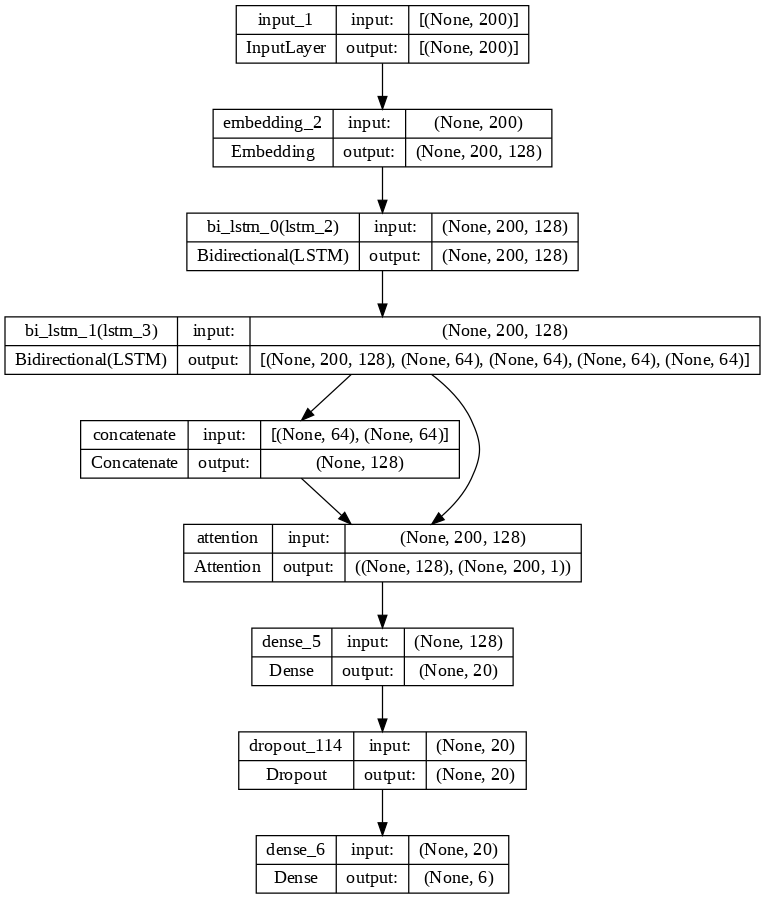

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=90)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 4
history = model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=0.10)

Epoch 1/4
284/284 [==============================] - 56s 159ms/step - loss: 0.7506 - accuracy: 0.5147 - val_loss: 0.5668 - val_accuracy: 0.7410
Epoch 2/4
284/284 [==============================] - 17s 61ms/step - loss: 0.5603 - accuracy: 0.7359 - val_loss: 0.5676 - val_accuracy: 0.7306
Epoch 3/4
284/284 [==============================] - 14s 51ms/step - loss: 0.4393 - accuracy: 0.8177 - val_loss: 0.4482 - val_accuracy: 0.8098
Epoch 4/4
284/284 [==============================] - 13s 46ms/step - loss: 0.3369 - accuracy: 0.8747 - val_loss: 0.4511 - val_accuracy: 0.8148


In [ ]:
prediction = np.argmax(model.predict(X_val),axis = -1)
print_metrices(valid_data['enc_label'],prediction)

211/211 [==============================] - 4s 14ms/step
[[2811  653]
 [ 631 2633]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      3464
           1       0.80      0.81      0.80      3264

    accuracy                           0.81      6728
   macro avg       0.81      0.81      0.81      6728
weighted avg       0.81      0.81      0.81      6728

Accuracy :  0.8091557669441142
Precison :  0.8092061177804871
Recall :  0.8091557669441142
F1 :  0.8091722886105629


In [ ]:
test_pred = np.argmax(model.predict(X_test), axis=-1).tolist()
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

211/211 [==============================] - 3s 14ms/step


,id,text,label
0,1,मैं ये नही सोच रहा की इसे निकले कैसे मैं ये सो...,Abusive
1,2,और दिवाली में भी पूरा देश पड़ाका नहीं फोडात,Abusive
2,3,कुत्ता बिल्ली पाल लेना मगर गलत फहमी कभी नहीं।,Abusive
3,4,तेरी गांड में प्याज काट देगा गुज्जर भोसड़ी के,Non_Abusive
4,5,बंगाली साड़ी ऐसे नहीं पहना जाता है दीदी,Abusive
...,...,...,...
6723,6724,आरे पागल लवडे कुछ तो समज आये वो कर ना,Non_Abusive
6724,6725,शेर नज़र अंदाज़ कर रहे हैं। इसे कमजोरी मत समझ ले...,Non_Abusive
6725,6726,लाल चड्डी के अंदर भी लाल ही होगा,Non_Abusive
6726,6727,कैसे है आप,Abusive


In [ ]:
run.to_csv('hindi_off_lstm+attn.csv',index = False)

# Tamil Dataset

Importing the test, validation and test data of tamil code-mix comments

In [ ]:
%%time
train_data = pd.read_csv("/content/tamil_train.csv")
valid_data = pd.read_csv("/content/tamil_val.csv")
test_data = pd.read_csv("/content/tamil_test.csv")

CPU times: user 111 ms, sys: 14.2 ms, total: 125 ms
Wall time: 135 ms


Print the data

In [ ]:
print(train_data)
print(valid_data)
print(test_data)

       label                                               text
0          1                          அம்மு காலை வணக்கம் அழகுடி
1          1          அசத்தலான அழகு நடிப்பு சூப்பர் ப்ரண்ட்ஸ் 💖
2          0             இப் புண்டா மவனே வீடியோ அளி டி தேவிடியா
3          1                      சானி அள்ளு போ.காஞ்சிறப்போகுது
4          1                          மிகவும் அழகான இளவரசி 💖👸💖✨
...      ...                                                ...
10953      0  உங்கம்மா புண்டமவனே  நீ எல்லம் உயிரேட இருக்க பே...
10954      0  போஸ்ட்ல் ஆபாசமாக கருத்துகளை தெரிவிப்பவர்கள் மற...
10955      1                          இது பல எடத்துல படுத்த ஆளு
10956      1                       நானும் சந்தோசம்மாக இருக்கும்
10957      0    இந்த மாதிரி சீனு போட்ட big Boss நடிகை ஆஸ்பத்திர

[10958 rows x 2 columns]
      label                                               text
0         0              தளபதி புண்டா மவனே வந்த ஓத்து விடுவேன்
1         1  பாடலுக்கு தகுந்தவாறு அழகிய பதிவு ங்க.இது எந்த ...
2         0  இத க

In [ ]:
train_data['label'].value_counts()

1    5865
0    5093
Name: label, dtype: int64

In [ ]:
valid_data['label'].value_counts()

1    3176
0    2824
Name: label, dtype: int64

In [ ]:
train_data['enc_label'] = train_data['label']
valid_data['enc_label'] = valid_data['label']

In [ ]:
train_data

,label,text,enc_label
0,1,அம்மு காலை வணக்கம் அழகுடி,1
1,1,அசத்தலான அழகு நடிப்பு சூப்பர் ப்ரண்ட்ஸ் 💖,1
2,0,இப் புண்டா மவனே வீடியோ அளி டி தேவிடியா,0
3,1,சானி அள்ளு போ.காஞ்சிறப்போகுது,1
4,1,மிகவும் அழகான இளவரசி 💖👸💖✨,1
...,...,...,...
10953,0,உங்கம்மா புண்டமவனே நீ எல்லம் உயிரேட இருக்க பே...,0
10954,0,போஸ்ட்ல் ஆபாசமாக கருத்துகளை தெரிவிப்பவர்கள் மற...,0
10955,1,இது பல எடத்துல படுத்த ஆளு,1
10956,1,நானும் சந்தோசம்மாக இருக்கும்,1


In [ ]:
train_data['text'].tolist()

['அம்மு காலை வணக்கம் அழகுடி',
 'அசத்தலான அழகு நடிப்பு சூப்பர் ப்ரண்ட்ஸ் 💖',
 'இப் புண்டா மவனே வீடியோ அளி டி தேவிடியா',
 'சானி அள்ளு போ.காஞ்சிறப்போகுது',
 'மிகவும் அழகான இளவரசி 💖👸💖✨',
 'ஏன்டா நீங்க இந்த மாதிரி வீடியோ போட்டு moj க்கு மூடு விழா நடத்திருவீங்க போல',
 'டேய் விருந்தினர்களுக்கு பிறந்த சொறி நாயே மேலே உள்ள படம் பாரதி வாலிபர் கீழே உள்ள படத்தில் திருமணமாகி தன் மனைவி உடன் இருப்பது',
 'ம்ம் யாரு பண்ணுரா பாபோம் பொட்ட தே,,,"""வ்டியான் கிடையாதுடி உங்கள மாரி',
 'உங்க அம்மா உம் பொண்ணு தான் so எல்லா girls ஒன்னு சொல்லாதீங்க',
 'மீனா பொண்ணு மீனா பொண்ணு மாசி யில் பொட்ட maaraponnu',
 'ஓம்  முத்தழகு துணை',
 'தெருநாய்களை பிடிக்க அரசுநடவடிக்கை எடுக்க வேண்டும் நாய் வளர்ப்பவர்களுக்கு மாதம் 1000 வரிகட்ட சொன்னால் யாரும் வளர்த்து தெருவில் விடமாட்டார்கள். விலங்குகளுக்கு காட்டும் அன்பை மனிதனுக்கும் சிறிது காட்டுங்கள். நாய் வளர்ப்பது தவறில்லை தெருவில் திறந்துவிட வேண்டாம்.',
 'நான் உங்களுக்கு பையன் மாதிரி ஓகே வா',
 'Mucha paru தொடுங்கனு சொல்லிட்டு நாங்க அமுக்கி கொன்னுட்டாம..😡😡😡',
 'பின்னாடி சூப்பர் அக்கா

In [ ]:
print("Size of the training data ==> ", train_data.shape)
print("Size of the validation data ==>", valid_data.shape)
print("Size of the Test data ==>", test_data.shape)

Size of the training data ==>  (10958, 3)
Size of the validation data ==> (6000, 3)
Size of the Test data ==> (6000, 2)


## One Hot Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(train_data[['label']]))
encoded_labels .columns = encoder.get_feature_names(['label'])
train_data= pd.concat([train_data, encoded_labels ], axis=1)

In [ ]:
train_data.columns

Index(['label', 'text', 'enc_label', 'label_0', 'label_1'], dtype='object')

In [ ]:
train_data

,label,text,enc_label,label_0,label_1
0,1,அம்மு காலை வணக்கம் அழகுடி,1,0.0,1.0
1,1,அசத்தலான அழகு நடிப்பு சூப்பர் ப்ரண்ட்ஸ் 💖,1,0.0,1.0
2,0,இப் புண்டா மவனே வீடியோ அளி டி தேவிடியா,0,1.0,0.0
3,1,சானி அள்ளு போ.காஞ்சிறப்போகுது,1,0.0,1.0
4,1,மிகவும் அழகான இளவரசி 💖👸💖✨,1,0.0,1.0
...,...,...,...,...,...
10953,0,உங்கம்மா புண்டமவனே நீ எல்லம் உயிரேட இருக்க பே...,0,1.0,0.0
10954,0,போஸ்ட்ல் ஆபாசமாக கருத்துகளை தெரிவிப்பவர்கள் மற...,0,1.0,0.0
10955,1,இது பல எடத்துல படுத்த ஆளு,1,0.0,1.0
10956,1,நானும் சந்தோசம்மாக இருக்கும்,1,0.0,1.0


In [ ]:
train_data = train_data.rename(columns={'label_0':'Non_Abusive','label_1':'Abusive'})
train_data

,label,text,enc_label,Non_Abusive,Abusive
0,1,அம்மு காலை வணக்கம் அழகுடி,1,0.0,1.0
1,1,அசத்தலான அழகு நடிப்பு சூப்பர் ப்ரண்ட்ஸ் 💖,1,0.0,1.0
2,0,இப் புண்டா மவனே வீடியோ அளி டி தேவிடியா,0,1.0,0.0
3,1,சானி அள்ளு போ.காஞ்சிறப்போகுது,1,0.0,1.0
4,1,மிகவும் அழகான இளவரசி 💖👸💖✨,1,0.0,1.0
...,...,...,...,...,...
10953,0,உங்கம்மா புண்டமவனே நீ எல்லம் உயிரேட இருக்க பே...,0,1.0,0.0
10954,0,போஸ்ட்ல் ஆபாசமாக கருத்துகளை தெரிவிப்பவர்கள் மற...,0,1.0,0.0
10955,1,இது பல எடத்துல படுத்த ஆளு,1,0.0,1.0
10956,1,நானும் சந்தோசம்மாக இருக்கும்,1,0.0,1.0


## Cleaning

Cleaning comments to remove special characters and URLs

In [ ]:

'''
Text Cleaning
'''
def text_cleaning(row):
  # to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = post.replace('—', ' ')
  # to remove accented characters
  new_text = unicodedata.normalize('NFKD', post).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  # to remove special characters and numbers
  # define the pattern to keep
  #pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
  #text = re.sub(pat, '', new_text)
  #to remove punctuation
  text = ''.join([c for c in text if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower() 
  # Stopword Removing
  tokenizer = ToktokTokenizer()
  # convert sentence into token of words
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
 
  return text

In [ ]:
#removing URLs and Punctuations
#train_data['cleaned'] = train_data['tweet'].apply(remove_url)
#Removing punctuations
train_data['cleaned'] = train_data['text'].apply(text_cleaning)
valid_data['cleaned'] = valid_data['text'].apply(text_cleaning)
test_data['cleaned'] = test_data['text'].apply(text_cleaning)

## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(10):
  print("Original Data:===\n",train_data.text[i],"\nCleaned Data:===\n",train_data.cleaned[i],)

Data samples after cleaning:

Original Data:===
 அம்மு காலை வணக்கம் அழகுடி 
Cleaned Data:===
 அம்மு காலை வணக்கம் அழகுடி
Original Data:===
 அசத்தலான அழகு நடிப்பு சூப்பர் ப்ரண்ட்ஸ் 💖 
Cleaned Data:===
 அசத்தலான அழகு நடிப்பு சூப்பர் ப்ரண்ட்ஸ் 💖
Original Data:===
 இப் புண்டா மவனே வீடியோ அளி டி தேவிடியா 
Cleaned Data:===
 இப் புண்டா மவனே வீடியோ அளி டி தேவிடியா
Original Data:===
 சானி அள்ளு போ.காஞ்சிறப்போகுது 
Cleaned Data:===
 சானி அள்ளு போகாஞ்சிறப்போகுது
Original Data:===
 மிகவும் அழகான இளவரசி 💖👸💖✨ 
Cleaned Data:===
 மிகவும் அழகான இளவரசி 💖👸💖✨
Original Data:===
 ஏன்டா நீங்க இந்த மாதிரி வீடியோ போட்டு moj க்கு மூடு விழா நடத்திருவீங்க போல 
Cleaned Data:===
 ஏன்டா நீங்க இந்த மாதிரி வீடியோ போட்டு moj க்கு மூடு விழா நடத்திருவீங்க போல
Original Data:===
 டேய் விருந்தினர்களுக்கு பிறந்த சொறி நாயே மேலே உள்ள படம் பாரதி வாலிபர் கீழே உள்ள படத்தில் திருமணமாகி தன் மனைவி உடன் இருப்பது 
Cleaned Data:===
 டேய் விருந்தினர்களுக்கு பிறந்த சொறி நாயே மேலே உள்ள படம் பாரதி வாலிபர் கீழே உள்ள படத்தில் திருமணமாகி தன் ம

In [ ]:
valid_data['cleaned'].shape

(6000,)

## Data Statistics

In [ ]:
def char_length(row):
    return len(row.split())

In [ ]:
train_data.columns

Index(['label', 'text', 'enc_label', 'Non_Abusive', 'Abusive', 'cleaned'], dtype='object')

In [ ]:
lables = ['Non_Abusive','Abusive']

# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1.0].cleaned) for word in t.strip().split()]
    print(f"\nClass Name:--> {l} ") 
    print("Number of Words:{}".format(len(word_list))) 
    print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
    print("Maximum post length: {}".format(max(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1.0].cleaned.apply(char_length))))

In [ ]:
dataset_statistics(train_data)


Class Name:--> Non_Abusive 
Number of Words:47529
Number of Unique Words:15073
Maximum post length: 154
Average Words in texts: 9.332220695071667

Class Name:--> Abusive 
Number of Words:56550
Number of Unique Words:17131
Maximum post length: 132
Average Words in texts: 9.641943734015346


## Tweets length per class

In [ ]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['Non_Abusive','Abusive']]
  label = label.values
  comment = dataset['cleaned']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix].split())
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
  labelsplt = ['Non_Abusive','Abusive']
  color = ['red','green']    
  bins = [1,5]   
  plt.figure(figsize=(5,3)) 
  #plt.title ('Tweets Length Distribution Per Class')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 20, 0, 8000])
  plt.xlabel('Length of texts')
  plt.ylabel('Number of texts') 
  plt.legend()
  #plt.savefig(path+'real-fake_no_title.png',dpi = 600,bbox_inches ='tight')
  #plt.grid(True)
  plt.show()

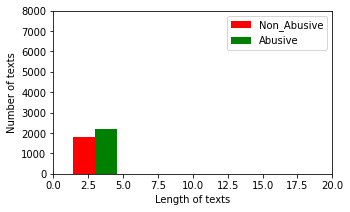

In [ ]:
comments_length_per_class(train_data,'Training')

##Ktrain -BERT

Applying BERT model

In [ ]:
!pip install ktrain

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [ ]:
import ktrain
from ktrain import text

In [ ]:
train_data['label'].value_counts()

1    5865
0    5093
Name: label, dtype: int64

In [ ]:
valid_data['label'].value_counts()

1    3176
0    2824
Name: label, dtype: int64

In [ ]:
categories = ['Non_Abusive','Abusive']

In [ ]:
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

X_valid = valid_data['text'].tolist()
y_valid = valid_data['label'].tolist()

X_test = test_data['text'].tolist()
#y_test = test_data['label'].tolist()

In [ ]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

In [ ]:
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_valid,y_valid)
#test = trans.preprocess_test(X_test,y_test)

preprocessing train...
language: ta
train sequence lengths:
	mean : 10
	95percentile : 24
	99percentile : 46


Is Multi-Label? False
preprocessing test...
language: ta
test sequence lengths:
	mean : 10
	95percentile : 25
	99percentile : 49


In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
913/913 [==============================] - 197s 165ms/step - loss: 0.6852 - accuracy: 0.5538
Epoch 2/10
913/913 [==============================] - 146s 159ms/step - loss: 0.5086 - accuracy: 0.7540
Epoch 3/10
913/913 [==============================] - 145s 159ms/step - loss: 0.3813 - accuracy: 0.8316
Epoch 4/10
913/913 [==============================] - 145s 158ms/step - loss: 0.4966 - accuracy: 0.7249
Epoch 5/10
913/913 [==============================] - 144s 158ms/step - loss: 0.7044 - accuracy: 0.5099
Epoch 6/10
913/913 [==============================] - 144s 158ms/step - loss: 0.8069 - accuracy: 0.5057
Epoch 7/10
913/913 [==============================] - 108s 118ms/step - loss: 1.5334 - accuracy: 0.5020


done.
Visually inspect loss plot and select learning rate associated with falling loss


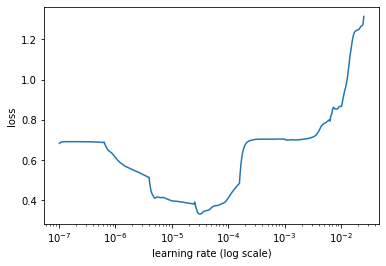

In [ ]:
learner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(train_data['label']),y= train_data['label'])
weight = {i : class_weights[i] for i in range(2)}
weight

{0: 1.0757903004123306, 1: 0.9341858482523444}

In [ ]:
learner.validate(class_names=categories)

188/188 [==============================] - 24s 112ms/step
              precision    recall  f1-score   support

 Non_Abusive       0.37      0.02      0.04      2824
     Abusive       0.53      0.97      0.68      3176

    accuracy                           0.52      6000
   macro avg       0.45      0.50      0.36      6000
weighted avg       0.45      0.52      0.38      6000



array([[  52, 2772],
       [  90, 3086]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [ ]:
# Save and load the model
predictor.save('ta_offensive_m-bert_cw_predictor')

In [ ]:
predictor = ktrain.load_predictor('ta_offensive_m-bert_cw_predictor')

In [ ]:
y_pred = predictor.predict(X_test)
y_pred

188/188 [==============================] - 27s 115ms/step


['Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Abusive',
 'Ab

In [ ]:
test_data['id'] = test_data.index+1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = y_pred
run

,id,text,label
0,1,ஆம்பளையாக கூட ஆடுன்னா பெத்த மகன் கூட பாடற மூதேவி,Abusive
1,2,உங்களுக்கு ரொம்ப ரொம்ப ரொம்ப பெரிய மனசு,Abusive
2,3,குசு விட்டதுகெல்லாம் கேஸ் மாதிரி பட்டாசு வெடிச...,Abusive
3,4,நீ ஒரு ஆளு புண்டை,Abusive
4,5,"ரொம்ப நாட்டுக்கு முக்கிய செய்தி, அட போங்கட, வா...",Abusive
...,...,...,...
5995,5996,கிறுக்கு koo...... மவ,Abusive
5996,5997,சொல்லணும் உன்கிட்ட தான்,Abusive
5997,5998,தாய் தான் நாய் பட்டம் வாங்காதீர்,Abusive
5998,5999,எவ்வளவு கமிஷன் உனக்கு?,Abusive


In [ ]:
run['label'].value_counts()

Abusive        5870
Non_Abusive     130
Name: label, dtype: int64

In [ ]:
run.to_csv('tamil_off_indic-bert_cw.csv',index = False)

##Machine Learning

Applying Machine Learning techniques

In [ ]:
def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

In [ ]:
## TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
#use_idf=True,tokenizer=lambda x: x.split()
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
vectorised_posts = vectorizer.fit_transform(train_data['cleaned'])
vectorized_train_posts = vectorizer.transform(train_data['cleaned'])
vectorized_valid_posts = vectorizer.transform(valid_data['cleaned'])
vectorized_test_posts = vectorizer.transform(test_data['cleaned'])

print("Feature Size: ", vectorized_train_posts.shape[1])
#vectorizer.vocabulary_

Feature Size:  27644


In [ ]:
vectorized_valid_posts.shape

(6000, 27644)

In [ ]:
labels = ['Non_Abusive','Abusive']
def actual_label(row):
    return labels[row]

###LR

Logistic Regression

In [ ]:
# After Tunning
# Optimum C = 100 
lr = LogisticRegression(C=10,class_weight='balanced')
lr.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = lr.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

[[2303  505]
 [ 521 2671]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2808
           1       0.84      0.84      0.84      3192

    accuracy                           0.83      6000
   macro avg       0.83      0.83      0.83      6000
weighted avg       0.83      0.83      0.83      6000

Accuracy :  0.829
Precison :  0.8290679601258731
Recall :  0.829
F1 :  0.8290280736066697


In [ ]:
test_pred = lr.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,ஆம்பளையாக கூட ஆடுன்னா பெத்த மகன் கூட பாடற மூதேவி,Non_Abusive
1,2,உங்களுக்கு ரொம்ப ரொம்ப ரொம்ப பெரிய மனசு,Abusive
2,3,குசு விட்டதுகெல்லாம் கேஸ் மாதிரி பட்டாசு வெடிச...,Abusive
3,4,நீ ஒரு ஆளு புண்டை,Non_Abusive
4,5,"ரொம்ப நாட்டுக்கு முக்கிய செய்தி, அட போங்கட, வா...",Abusive
...,...,...,...
5995,5996,கிறுக்கு koo...... மவ,Non_Abusive
5996,5997,சொல்லணும் உன்கிட்ட தான்,Abusive
5997,5998,தாய் தான் நாய் பட்டம் வாங்காதீர்,Non_Abusive
5998,5999,எவ்வளவு கமிஷன் உனக்கு?,Non_Abusive


In [ ]:
run.to_csv('tamil_off_lr.csv',index = False)

###SVM

Support Vector Machine

In [ ]:
## SVM
from sklearn.svm import SVC
svc =  SVC(kernel='linear',C = 5,random_state=1234,class_weight='balanced')
svc.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = svc.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

[[2290  520]
 [ 534 2656]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2810
           1       0.84      0.83      0.83      3190

    accuracy                           0.82      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.82      0.82      0.82      6000

Accuracy :  0.8243333333333334
Precison :  0.8243925195576837
Recall :  0.8243333333333334
F1 :  0.8243584299400291


In [ ]:
test_pred = svc.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,ஆம்பளையாக கூட ஆடுன்னா பெத்த மகன் கூட பாடற மூதேவி,Non_Abusive
1,2,உங்களுக்கு ரொம்ப ரொம்ப ரொம்ப பெரிய மனசு,Abusive
2,3,குசு விட்டதுகெல்லாம் கேஸ் மாதிரி பட்டாசு வெடிச...,Non_Abusive
3,4,நீ ஒரு ஆளு புண்டை,Non_Abusive
4,5,"ரொம்ப நாட்டுக்கு முக்கிய செய்தி, அட போங்கட, வா...",Abusive
...,...,...,...
5995,5996,கிறுக்கு koo...... மவ,Non_Abusive
5996,5997,சொல்லணும் உன்கிட்ட தான்,Abusive
5997,5998,தாய் தான் நாய் பட்டம் வாங்காதீர்,Non_Abusive
5998,5999,எவ்வளவு கமிஷன் உனக்கு?,Abusive


In [ ]:
run.to_csv('tamil_off_svm.csv',index = False)

###Ensemble Approach(Majority Voting)

In [ ]:
LogReg_clf = LogisticRegression(class_weight='balanced')
DTree_clf = DecisionTreeClassifier(class_weight='balanced')
rt_clf =   RandomForestClassifier(class_weight='balanced')
SVC_clf = SVC(class_weight='balanced')

voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf),('RF', rt_clf)], voting='hard')
voting_clf.fit(vectorized_train_posts, train_data['enc_label'])
preds = voting_clf.predict(vectorized_valid_posts)

In [ ]:
print_metrices(valid_data['enc_label'],preds)

[[2337  487]
 [ 508 2668]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      2824
           1       0.85      0.84      0.84      3176

    accuracy                           0.83      6000
   macro avg       0.83      0.83      0.83      6000
weighted avg       0.83      0.83      0.83      6000

Accuracy :  0.8341666666666666
Precison :  0.8342513691641669
Recall :  0.8341666666666666
F1 :  0.8341987840642834


In [ ]:
test_pred = voting_clf.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,ஆம்பளையாக கூட ஆடுன்னா பெத்த மகன் கூட பாடற மூதேவி,Non_Abusive
1,2,உங்களுக்கு ரொம்ப ரொம்ப ரொம்ப பெரிய மனசு,Abusive
2,3,குசு விட்டதுகெல்லாம் கேஸ் மாதிரி பட்டாசு வெடிச...,Abusive
3,4,நீ ஒரு ஆளு புண்டை,Non_Abusive
4,5,"ரொம்ப நாட்டுக்கு முக்கிய செய்தி, அட போங்கட, வா...",Abusive
...,...,...,...
5995,5996,கிறுக்கு koo...... மவ,Non_Abusive
5996,5997,சொல்லணும் உன்கிட்ட தான்,Abusive
5997,5998,தாய் தான் நாய் பட்டம் வாங்காதீர்,Non_Abusive
5998,5999,எவ்வளவு கமிஷன் உனக்கு?,Non_Abusive


In [ ]:
run.to_csv('tamil_off_voting.csv',index = False)

##Deep Learning

Applying Deep Learning techniques

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
print("Tensorflow Version:--",tf.version.VERSION)
print("Keras Version:---",keras.__version__)

Tensorflow Version:-- 2.11.0
Keras Version:--- 2.11.0


###Tokenization

In [ ]:
tokenizer = Tokenizer(num_words = 20000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
tokenizer.fit_on_texts(train_data['text'])  
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [ ]:
print(vocab_size)

27565


In [ ]:
max_len = 50
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(valid_data['text'])
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

27564
Number of Training Sequences : (10958, 50)
Number of Validation Sequences : (6000, 50)


In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

Number of Test Sequences : (6000, 50)


In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(train_data['enc_label']),y = train_data['enc_label'])

weight = {i : class_weights[i] for i in range(2)}

In [ ]:
weight

{0: 1.0757903004123306, 1: 0.9341858482523444}

In [ ]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath =  "ta_off_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 100, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 100,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(6 , activation='softmax')])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 100)           2756500   
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 200)          160800    
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_7 (Dense)             (None, 6)                 60006     
                                                                 
Total params: 2,977,306
Trainable params: 2,977,306
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=15,
    batch_size = 64,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

Epoch 1/15
135/137 [============================>.] - ETA: 0s - loss: 0.5558 - accuracy: 0.7041
Epoch 1: val_accuracy improved from -inf to 0.82299, saving model to ta_off_BiLSTMModel.h5
137/137 [==============================] - 30s 165ms/step - loss: 0.5543 - accuracy: 0.7049 - val_loss: 0.4005 - val_accuracy: 0.8230
Epoch 2/15
135/137 [============================>.] - ETA: 0s - loss: 0.2174 - accuracy: 0.9131
Epoch 2: val_accuracy improved from 0.82299 to 0.84307, saving model to ta_off_BiLSTMModel.h5
137/137 [==============================] - 11s 78ms/step - loss: 0.2170 - accuracy: 0.9132 - val_loss: 0.3910 - val_accuracy: 0.8431
Epoch 3/15
135/137 [============================>.] - ETA: 0s - loss: 0.0871 - accuracy: 0.9704
Epoch 3: val_accuracy did not improve from 0.84307
137/137 [==============================] - 5s 40ms/step - loss: 0.0874 - accuracy: 0.9703 - val_loss: 0.4590 - val_accuracy: 0.8371
Epoch 4/15
137/137 [==============================] - ETA: 0s - loss: 0.0454 

In [ ]:
# Load the saved model
model = load_model('ta_off_BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)

print("F1-Score:",f1_score(valid_data['enc_label'],y_pred,average = 'weighted')*100)
print("Accuracy:",accuracy_score(valid_data['enc_label'],y_pred)*100)

188/188 [==============================] - 1s 4ms/step
F1-Score: 82.38131446829435
Accuracy: 82.46666666666667


In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
print_metrices(valid_data['enc_label'],y_pred)

[[2160  664]
 [ 388 2788]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2824
           1       0.81      0.88      0.84      3176

    accuracy                           0.82      6000
   macro avg       0.83      0.82      0.82      6000
weighted avg       0.83      0.82      0.82      6000

Accuracy :  0.8246666666666667
Precison :  0.8265101610302736
Recall :  0.8246666666666667
F1 :  0.8238131446829435


### Test Set Prediction

In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()
test_pred

188/188 [==============================] - 1s 4ms/step


[0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,


In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,ஆம்பளையாக கூட ஆடுன்னா பெத்த மகன் கூட பாடற மூதேவி,Non_Abusive
1,2,உங்களுக்கு ரொம்ப ரொம்ப ரொம்ப பெரிய மனசு,Abusive
2,3,குசு விட்டதுகெல்லாம் கேஸ் மாதிரி பட்டாசு வெடிச...,Abusive
3,4,நீ ஒரு ஆளு புண்டை,Non_Abusive
4,5,"ரொம்ப நாட்டுக்கு முக்கிய செய்தி, அட போங்கட, வா...",Abusive
...,...,...,...
5995,5996,கிறுக்கு koo...... மவ,Non_Abusive
5996,5997,சொல்லணும் உன்கிட்ட தான்,Non_Abusive
5997,5998,தாய் தான் நாய் பட்டம் வாங்காதீர்,Non_Abusive
5998,5999,எவ்வளவு கமிஷன் உனக்கு?,Abusive


In [ ]:
run.to_csv('tamil_bilstm.csv',index = False)

##Pretrained Embedding

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ta.300.vec.gz'))

In [ ]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = vocab_and_vectors.get(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

###Model Defination

In [ ]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "prt_ta-off-BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300,weights=[embedding_matrix],trainable=False, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 200,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(6 , activation='softmax')])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 300)           8269500   
                                                                 
 bidirectional_3 (Bidirectio  (None, 50, 400)          801600    
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 20000)             0         
                                                                 
 dense_8 (Dense)             (None, 6)                 120006    
                                                                 
Total params: 9,191,106
Trainable params: 921,606
Non-trainable params: 8,269,500
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=50,
    batch_size = 64,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

Epoch 1/50
137/137 [==============================] - ETA: 0s - loss: 0.5409 - accuracy: 0.7486
Epoch 1: val_accuracy improved from -inf to 0.83166, saving model to prt_ta-off-BiLSTMModel.h5
137/137 [==============================] - 9s 30ms/step - loss: 0.5409 - accuracy: 0.7486 - val_loss: 0.4035 - val_accuracy: 0.8317
Epoch 2/50
136/137 [============================>.] - ETA: 0s - loss: 0.4019 - accuracy: 0.8232
Epoch 2: val_accuracy improved from 0.83166 to 0.83394, saving model to prt_ta-off-BiLSTMModel.h5
137/137 [==============================] - 3s 20ms/step - loss: 0.4020 - accuracy: 0.8228 - val_loss: 0.3799 - val_accuracy: 0.8339
Epoch 3/50
136/137 [============================>.] - ETA: 0s - loss: 0.3909 - accuracy: 0.8290
Epoch 3: val_accuracy improved from 0.83394 to 0.83714, saving model to prt_ta-off-BiLSTMModel.h5
137/137 [==============================] - 3s 25ms/step - loss: 0.3906 - accuracy: 0.8293 - val_loss: 0.3750 - val_accuracy: 0.8371
Epoch 4/50
135/137 [=====

In [ ]:
# Load the saved model
model = load_model('prt_ta-off-BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)
print_metrices(y_pred,valid_data['enc_label'])


188/188 [==============================] - 1s 5ms/step
[[2308  529]
 [ 516 2647]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      2837
           1       0.83      0.84      0.84      3163

    accuracy                           0.83      6000
   macro avg       0.83      0.83      0.83      6000
weighted avg       0.83      0.83      0.83      6000

Accuracy :  0.8258333333333333
Precison :  0.8257983246932257
Recall :  0.8258333333333333
F1 :  0.825811944150938


In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()
test_pred

188/188 [==============================] - 1s 4ms/step


[0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,


In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,ஆம்பளையாக கூட ஆடுன்னா பெத்த மகன் கூட பாடற மூதேவி,Non_Abusive
1,2,உங்களுக்கு ரொம்ப ரொம்ப ரொம்ப பெரிய மனசு,Abusive
2,3,குசு விட்டதுகெல்லாம் கேஸ் மாதிரி பட்டாசு வெடிச...,Abusive
3,4,நீ ஒரு ஆளு புண்டை,Non_Abusive
4,5,"ரொம்ப நாட்டுக்கு முக்கிய செய்தி, அட போங்கட, வா...",Non_Abusive
...,...,...,...
5995,5996,கிறுக்கு koo...... மவ,Non_Abusive
5996,5997,சொல்லணும் உன்கிட்ட தான்,Abusive
5997,5998,தாய் தான் நாய் பட்டம் வாங்காதீர்,Non_Abusive
5998,5999,எவ்வளவு கமிஷன் உனக்கு?,Abusive


In [ ]:
run.to_csv('tamil_cnn+bilstm+fasttext.csv',index = False)

##Attention

Applying attention based models

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Add, BatchNormalization, Activation, Dropout

In [ ]:
MAX_FEATURES = 10000
EMBED_SIZE = 128
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_data['cleaned'])
list_tokenized_train = tokenizer.texts_to_sequences(train_data['cleaned'])
list_tokenized_val = tokenizer.texts_to_sequences(valid_data['cleaned'])  
list_tokenized_test = tokenizer.texts_to_sequences(test_data['cleaned'])  
RNN_CELL_SIZE = 100
  
MAX_LEN = 200  
X_train = pad_sequences(list_tokenized_train, maxlen=MAX_LEN)
y_train = train_data['enc_label']
X_val = pad_sequences(list_tokenized_val, maxlen=MAX_LEN)
y_val = valid_data['enc_label']
X_test = pad_sequences(list_tokenized_test, maxlen=MAX_LEN)

In [ ]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
          
        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
          
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [ ]:
sequence_input = Input(shape=(MAX_LEN,), dtype="int32")
embedded_sequences = Embedding(MAX_FEATURES, EMBED_SIZE)(sequence_input)

In [ ]:
#conv = Convolution1D(128,5,activation='relu')(embedded_sequences)
#pol = GlobalMaxPool1D()(conv)

lstm = Bidirectional(LSTM(64, return_sequences = True), name="bi_lstm_0")(embedded_sequences)

# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(64, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)

In [ ]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
context_vector, attention_weights = Attention(20)(lstm, state_h)
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.1)(dense1)
output = Dense(6, activation="softmax")(dropout)
  
model = keras.Model(inputs=sequence_input, outputs=output)

In [ ]:
# summarize layers
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_5 (Embedding)        (None, 200, 128)     1280000     ['input_2[0][0]']                
                                                                                                  
 bi_lstm_0 (Bidirectional)      (None, 200, 128)     98816       ['embedding_5[0][0]']            
                                                                                                  
 bi_lstm_1 (Bidirectional)      [(None, 200, 128),   98816       ['bi_lstm_0[0][0]']              
                                 (None, 64),                                                

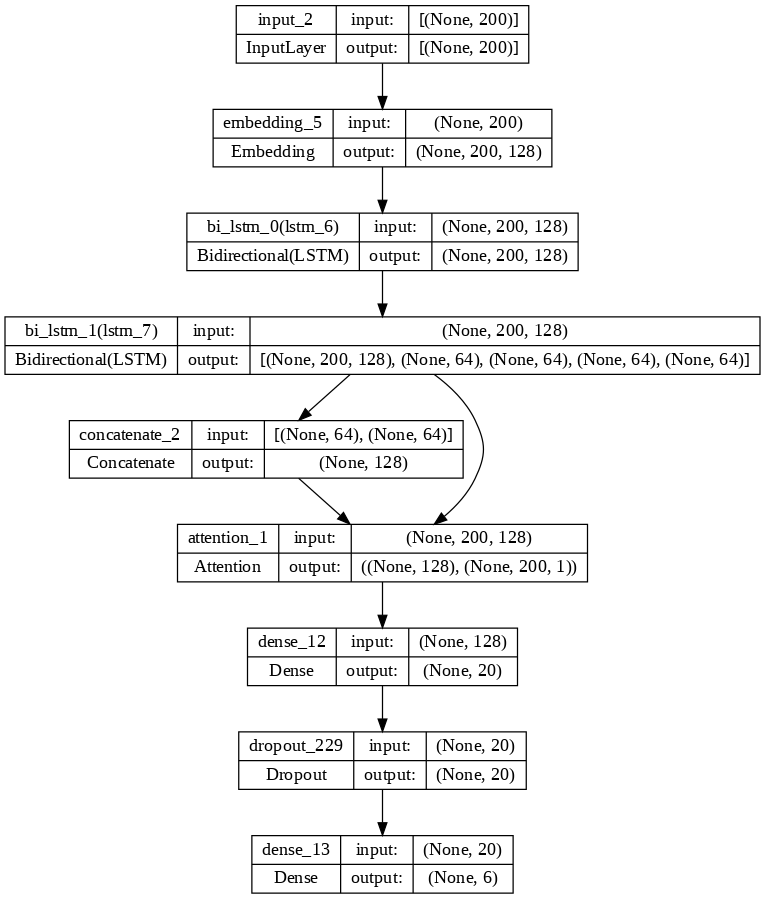

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=90)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 4
history = model.fit(X_train,y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.10)

Epoch 1/4
155/155 [==============================] - 33s 147ms/step - loss: 0.7363 - accuracy: 0.5427 - val_loss: 0.4755 - val_accuracy: 0.7892
Epoch 2/4
155/155 [==============================] - 12s 75ms/step - loss: 0.3738 - accuracy: 0.8521 - val_loss: 0.3955 - val_accuracy: 0.8458
Epoch 3/4
155/155 [==============================] - 8s 49ms/step - loss: 0.2466 - accuracy: 0.9178 - val_loss: 0.3910 - val_accuracy: 0.8549
Epoch 4/4
155/155 [==============================] - 8s 51ms/step - loss: 0.1937 - accuracy: 0.9421 - val_loss: 0.3799 - val_accuracy: 0.8339


In [ ]:
prediction = np.argmax(model.predict(X_val),axis = -1)
print_metrices(valid_data['enc_label'],prediction)

188/188 [==============================] - 4s 15ms/step
[[2315  509]
 [ 606 2570]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      2824
           1       0.83      0.81      0.82      3176

    accuracy                           0.81      6000
   macro avg       0.81      0.81      0.81      6000
weighted avg       0.81      0.81      0.81      6000

Accuracy :  0.8141666666666667
Precison :  0.8148480881761082
Recall :  0.8141666666666667
F1 :  0.8142945806974959


In [ ]:
test_pred = np.argmax(model.predict(X_test), axis=-1).tolist()
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

188/188 [==============================] - 3s 15ms/step


,id,text,label
0,1,ஆம்பளையாக கூட ஆடுன்னா பெத்த மகன் கூட பாடற மூதேவி,Non_Abusive
1,2,உங்களுக்கு ரொம்ப ரொம்ப ரொம்ப பெரிய மனசு,Abusive
2,3,குசு விட்டதுகெல்லாம் கேஸ் மாதிரி பட்டாசு வெடிச...,Abusive
3,4,நீ ஒரு ஆளு புண்டை,Non_Abusive
4,5,"ரொம்ப நாட்டுக்கு முக்கிய செய்தி, அட போங்கட, வா...",Abusive
...,...,...,...
5995,5996,கிறுக்கு koo...... மவ,Non_Abusive
5996,5997,சொல்லணும் உன்கிட்ட தான்,Abusive
5997,5998,தாய் தான் நாய் பட்டம் வாங்காதீர்,Non_Abusive
5998,5999,எவ்வளவு கமிஷன் உனக்கு?,Abusive


In [ ]:
run.to_csv('tamil_off_lstm+attn.csv',index = False)

# Malayalam Dataset 

Importing the test, validation and test data of malayalam code-mix comments

In [ ]:
%%time
train_data = pd.read_csv('/content/malyalam_train.csv')
valid_data = pd.read_csv('/content/malyalam_val.csv')
test_data = pd.read_csv('/content/malyalam_test.csv')

CPU times: user 162 ms, sys: 28.3 ms, total: 191 ms
Wall time: 333 ms


Print the data

In [ ]:
print(train_data)
print(valid_data)
print(test_data)

       label                                               text
0          1                          പ്ലസ് ഒന്നു ഫോളോ  cheyumo
1          0  രണ്ടെണ്ണത്തിനെ ഞാൻ കണ്ടു.. മൂന്ന് പെറ്റു തള്ളച...
2          0  ഇവൾ ആണോ ന്യായം പറയാൻ വരുന്നവൾ ഞാൻ നീ തുരുകി കയ...
3          1                                ഹായ് ചേച്ചി അടിപൊളി
4          1  എനിക്ക് സത്യം പറഞ്ഞ അബിടെ സ്വഭാവം വെച് ക്ഷമ എന...
...      ...                                                ...
15503      1      നിന്റെ അപ്പൻ വീട്ടിൽ ഉണ്ടോ അങ്ങേരോട് പോയ്‌ പറ
15504      1  40രൂപക്ക് പെട്രോൾ ഡീസൽ എന്നിവ നൽകും എന്ന് വ്കധ...
15505      1  Potta. Madhamudhi.edhuvada. കൊറങ്ങനെ  പോലെ ഇരി...
15506      1  എല്ലാം കൂടുന്നുണ്ട് സാദാരണക്കാരന്റെ വരുമാനം ഒഴ...
15507      0  നിൻറെ അപ്പൻറെ ഷൂ ആണോ നക്കിയത് കള്ളനാണം ഇല്ലാത്...

[15508 rows x 2 columns]
      label                                               text
0         0  തുണി ഊരി അത്രക്ക് കാണാൻ മുട്ടി നിക്കുവായിരുന്ന...
1         1  സൂപ്പറായിട്ടുണ്ട് കലക്കി 👌👌👌👌 എന്റെ വീഡിയോസ് ഒ...
2         1      

In [ ]:
train_data['label'].value_counts()

1    8525
0    6983
Name: label, dtype: int64

In [ ]:
valid_data['label'].value_counts()

1    2834
0    2336
Name: label, dtype: int64

In [ ]:
train_data['enc_label'] = train_data['label']
valid_data['enc_label'] = valid_data['label']

In [ ]:
train_data

,label,text,enc_label
0,1,പ്ലസ് ഒന്നു ഫോളോ cheyumo,1
1,0,രണ്ടെണ്ണത്തിനെ ഞാൻ കണ്ടു.. മൂന്ന് പെറ്റു തള്ളച...,0
2,0,ഇവൾ ആണോ ന്യായം പറയാൻ വരുന്നവൾ ഞാൻ നീ തുരുകി കയ...,0
3,1,ഹായ് ചേച്ചി അടിപൊളി,1
4,1,എനിക്ക് സത്യം പറഞ്ഞ അബിടെ സ്വഭാവം വെച് ക്ഷമ എന...,1
...,...,...,...
15503,1,നിന്റെ അപ്പൻ വീട്ടിൽ ഉണ്ടോ അങ്ങേരോട് പോയ്‌ പറ,1
15504,1,40രൂപക്ക് പെട്രോൾ ഡീസൽ എന്നിവ നൽകും എന്ന് വ്കധ...,1
15505,1,Potta. Madhamudhi.edhuvada. കൊറങ്ങനെ പോലെ ഇരി...,1
15506,1,എല്ലാം കൂടുന്നുണ്ട് സാദാരണക്കാരന്റെ വരുമാനം ഒഴ...,1


In [ ]:
train_data['text'].tolist()

['പ്ലസ് ഒന്നു ഫോളോ  cheyumo',
 'രണ്ടെണ്ണത്തിനെ ഞാൻ കണ്ടു.. മൂന്ന് പെറ്റു തള്ളച്ചി ആയി..',
 'ഇവൾ ആണോ ന്യായം പറയാൻ വരുന്നവൾ ഞാൻ നീ തുരുകി കയറ്റിക്കൊ മയിരേ നല്ല സുഖം ഉണ്ടാവും നിന്റെ അതിന് 😡',
 'ഹായ് ചേച്ചി അടിപൊളി',
 'എനിക്ക് സത്യം പറഞ്ഞ അബിടെ സ്വഭാവം വെച് ക്ഷമ എന്നൊരു സാധനം കൊടുക്കാനെ തോന്നുന്നില്ല',
 'പണത്തിനു വേണ്ടി എന്ത് തെണ്ടിത്തരവും കാണിക്കുന്ന ഓരോ വന്ണങ്ങൾ',
 'പിന്നെന്തിനാടോ അയാൾ അമേരിയ്ക്കയിലേയ്ക്ക് ഓടുന്നത്?',
 'പൂറി മോൾ hi ധു ആ',
 'കുണ്ടി പെണ്ണിനെ pidiche😂',
 'പിന്നെ ലാൽസലാം കോപ്പി അടിച്ച് നീൽസലാം ആക്കിയത് പോലെ അത്ര എളുപ്പമല്ല.... ഒരു പാർട്ടിക്കാരുടെയും കുത്തക അല്ല പൊതു നിരം... വണ്ടിയെയും പെട്രോൾ വില വര്ധനവിനെയും പറ്റി വ്യാകുലപ്പെടുന്നവൻമാർ ആണ് അദ്ദേഹത്തിന്റെ വണ്ടി കൊതിച്ചതും നാണം ഇല്ലാതെ തെണ്ടി മറ്റുള്ളവരുടെ വായിൽ ഉള്ളത് കേൾക്കുന്നതും..... സ്വൽപ്പം വിവരം ലേശം ഉളുപ്പ് രണ്ടും ഇല്ലന്നറിയാം ആവശ്യത്തിന് മണ്ടത്തരവും 😂',
 'ആ ചന്ദുവും മാനവും കൂടി ആണോ  അമ്മുനെ കൊന്നത് 🤔🥺...    തെക്കന്റെ കഥയിലെ വില്ലൻ രുദ്രനും അനന്ദനും ആണാണെങ്കിൽ ഇവിടെ അപ്പുവിന്റെ  ജീവിതത്തിൽ ഈ മനുവും ചന്ദുവും 😒😒.....   

In [ ]:
print("Size of the training data ==> ", train_data.shape)
print("Size of the validation data ==>", valid_data.shape)
print("Size of the Test data ==>", test_data.shape)

Size of the training data ==>  (15508, 3)
Size of the validation data ==> (5170, 3)
Size of the Test data ==> (5170, 2)


## One Hot Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(train_data[['label']]))
encoded_labels .columns = encoder.get_feature_names(['label'])
train_data= pd.concat([train_data, encoded_labels ], axis=1)

In [ ]:
train_data.columns

Index(['label', 'text', 'enc_label', 'label_0', 'label_1'], dtype='object')

In [ ]:
train_data

,label,text,enc_label,label_0,label_1
0,1,പ്ലസ് ഒന്നു ഫോളോ cheyumo,1,0.0,1.0
1,0,രണ്ടെണ്ണത്തിനെ ഞാൻ കണ്ടു.. മൂന്ന് പെറ്റു തള്ളച...,0,1.0,0.0
2,0,ഇവൾ ആണോ ന്യായം പറയാൻ വരുന്നവൾ ഞാൻ നീ തുരുകി കയ...,0,1.0,0.0
3,1,ഹായ് ചേച്ചി അടിപൊളി,1,0.0,1.0
4,1,എനിക്ക് സത്യം പറഞ്ഞ അബിടെ സ്വഭാവം വെച് ക്ഷമ എന...,1,0.0,1.0
...,...,...,...,...,...
15503,1,നിന്റെ അപ്പൻ വീട്ടിൽ ഉണ്ടോ അങ്ങേരോട് പോയ്‌ പറ,1,0.0,1.0
15504,1,40രൂപക്ക് പെട്രോൾ ഡീസൽ എന്നിവ നൽകും എന്ന് വ്കധ...,1,0.0,1.0
15505,1,Potta. Madhamudhi.edhuvada. കൊറങ്ങനെ പോലെ ഇരി...,1,0.0,1.0
15506,1,എല്ലാം കൂടുന്നുണ്ട് സാദാരണക്കാരന്റെ വരുമാനം ഒഴ...,1,0.0,1.0


In [ ]:
train_data = train_data.rename(columns={'label_0':'Non_Abusive','label_1':'Abusive'})
train_data

,label,text,enc_label,Non_Abusive,Abusive
0,1,പ്ലസ് ഒന്നു ഫോളോ cheyumo,1,0.0,1.0
1,0,രണ്ടെണ്ണത്തിനെ ഞാൻ കണ്ടു.. മൂന്ന് പെറ്റു തള്ളച...,0,1.0,0.0
2,0,ഇവൾ ആണോ ന്യായം പറയാൻ വരുന്നവൾ ഞാൻ നീ തുരുകി കയ...,0,1.0,0.0
3,1,ഹായ് ചേച്ചി അടിപൊളി,1,0.0,1.0
4,1,എനിക്ക് സത്യം പറഞ്ഞ അബിടെ സ്വഭാവം വെച് ക്ഷമ എന...,1,0.0,1.0
...,...,...,...,...,...
15503,1,നിന്റെ അപ്പൻ വീട്ടിൽ ഉണ്ടോ അങ്ങേരോട് പോയ്‌ പറ,1,0.0,1.0
15504,1,40രൂപക്ക് പെട്രോൾ ഡീസൽ എന്നിവ നൽകും എന്ന് വ്കധ...,1,0.0,1.0
15505,1,Potta. Madhamudhi.edhuvada. കൊറങ്ങനെ പോലെ ഇരി...,1,0.0,1.0
15506,1,എല്ലാം കൂടുന്നുണ്ട് സാദാരണക്കാരന്റെ വരുമാനം ഒഴ...,1,0.0,1.0


## Cleaning

Cleaning comments to remove special characters and URLs

In [ ]:
'''
Text Cleaning
'''
def text_cleaning(row):
  # to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = post.replace('—', ' ')
  # to remove accented characters
  new_text = unicodedata.normalize('NFKD', post).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  #to remove punctuation
  text = ''.join([c for c in text if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower() 
  # Stopword Removing
  tokenizer = ToktokTokenizer()
  # convert sentence into token of words
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
 

  return text

In [ ]:
#removing URLs and Punctuations
#train_data['cleaned'] = train_data['tweet'].apply(remove_url)
#Removing punctuations
train_data['cleaned'] = train_data['text'].apply(text_cleaning)
valid_data['cleaned'] = valid_data['text'].apply(text_cleaning)
test_data['cleaned'] = test_data['text'].apply(text_cleaning)

## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(10):
  print("Original Data:===\n",train_data.text[i],"\nCleaned Data:===\n",train_data.cleaned[i],)

Data samples after cleaning:

Original Data:===
 പ്ലസ് ഒന്നു ഫോളോ  cheyumo 
Cleaned Data:===
 പ്ലസ് ഒന്നു ഫോളോ cheyumo
Original Data:===
 രണ്ടെണ്ണത്തിനെ ഞാൻ കണ്ടു.. മൂന്ന് പെറ്റു തള്ളച്ചി ആയി.. 
Cleaned Data:===
 രണ്ടെണ്ണത്തിനെ ഞാൻ കണ്ടു മൂന്ന് പെറ്റു തള്ളച്ചി ആയി
Original Data:===
 ഇവൾ ആണോ ന്യായം പറയാൻ വരുന്നവൾ ഞാൻ നീ തുരുകി കയറ്റിക്കൊ മയിരേ നല്ല സുഖം ഉണ്ടാവും നിന്റെ അതിന് 😡 
Cleaned Data:===
 ഇവൾ ആണോ ന്യായം പറയാൻ വരുന്നവൾ ഞാൻ നീ തുരുകി കയറ്റിക്കൊ മയിരേ നല്ല സുഖം ഉണ്ടാവും നിന്റെ അതിന് 😡
Original Data:===
 ഹായ് ചേച്ചി അടിപൊളി 
Cleaned Data:===
 ഹായ് ചേച്ചി അടിപൊളി
Original Data:===
 എനിക്ക് സത്യം പറഞ്ഞ അബിടെ സ്വഭാവം വെച് ക്ഷമ എന്നൊരു സാധനം കൊടുക്കാനെ തോന്നുന്നില്ല 
Cleaned Data:===
 എനിക്ക് സത്യം പറഞ്ഞ അബിടെ സ്വഭാവം വെച് ക്ഷമ എന്നൊരു സാധനം കൊടുക്കാനെ തോന്നുന്നില്ല
Original Data:===
 പണത്തിനു വേണ്ടി എന്ത് തെണ്ടിത്തരവും കാണിക്കുന്ന ഓരോ വന്ണങ്ങൾ 
Cleaned Data:===
 പണത്തിനു വേണ്ടി എന്ത് തെണ്ടിത്തരവും കാണിക്കുന്ന ഓരോ വന്ണങ്ങൾ
Original Data:===
 പിന്നെന്തിനാടോ അയാൾ അമേരിയ്ക്കയിലേയ്ക്ക് ഓടുന്

In [ ]:
valid_data['cleaned'].shape

(5170,)

## Data Statistics

In [ ]:
def char_length(row):
    return len(row.split())

In [ ]:
lables = ['Non_Abusive','Abusive']

# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1.0].cleaned) for word in t.strip().split()]
    print(f"\nClass Name:--> {l} ") 
    print("Number of Words:{}".format(len(word_list))) 
    print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
    print("Maximum post length: {}".format(max(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    

In [ ]:
train_data

,label,text,enc_label,Non_Abusive,Abusive,cleaned
0,1,പ്ലസ് ഒന്നു ഫോളോ cheyumo,1,0.0,1.0,പ്ലസ് ഒന്നു ഫോളോ cheyumo
1,0,രണ്ടെണ്ണത്തിനെ ഞാൻ കണ്ടു.. മൂന്ന് പെറ്റു തള്ളച...,0,1.0,0.0,രണ്ടെണ്ണത്തിനെ ഞാൻ കണ്ടു മൂന്ന് പെറ്റു തള്ളച്ച...
2,0,ഇവൾ ആണോ ന്യായം പറയാൻ വരുന്നവൾ ഞാൻ നീ തുരുകി കയ...,0,1.0,0.0,ഇവൾ ആണോ ന്യായം പറയാൻ വരുന്നവൾ ഞാൻ നീ തുരുകി കയ...
3,1,ഹായ് ചേച്ചി അടിപൊളി,1,0.0,1.0,ഹായ് ചേച്ചി അടിപൊളി
4,1,എനിക്ക് സത്യം പറഞ്ഞ അബിടെ സ്വഭാവം വെച് ക്ഷമ എന...,1,0.0,1.0,എനിക്ക് സത്യം പറഞ്ഞ അബിടെ സ്വഭാവം വെച് ക്ഷമ എന...
...,...,...,...,...,...,...
15503,1,നിന്റെ അപ്പൻ വീട്ടിൽ ഉണ്ടോ അങ്ങേരോട് പോയ്‌ പറ,1,0.0,1.0,നിന്റെ അപ്പൻ വീട്ടിൽ ഉണ്ടോ അങ്ങേരോട് പോയ്‌ പറ
15504,1,40രൂപക്ക് പെട്രോൾ ഡീസൽ എന്നിവ നൽകും എന്ന് വ്കധ...,1,0.0,1.0,40രൂപക്ക് പെട്രോൾ ഡീസൽ എന്നിവ നൽകും എന്ന് വ്കധ...
15505,1,Potta. Madhamudhi.edhuvada. കൊറങ്ങനെ പോലെ ഇരി...,1,0.0,1.0,potta madhamudhiedhuvada കൊറങ്ങനെ പോലെ ഇരിക്കു...
15506,1,എല്ലാം കൂടുന്നുണ്ട് സാദാരണക്കാരന്റെ വരുമാനം ഒഴ...,1,0.0,1.0,എല്ലാം കൂടുന്നുണ്ട് സാദാരണക്കാരന്റെ വരുമാനം ഒഴ...


In [ ]:
dataset_statistics(train_data)


Class Name:--> Non_Abusive 
Number of Words:110090
Number of Unique Words:33878
Maximum post length: 160
Average Words in texts: 15.76543033080338

Class Name:--> Abusive 
Number of Words:93920
Number of Unique Words:30652
Maximum post length: 707
Average Words in texts: 11.01700879765396


## Tweets length per class

In [ ]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['Non_Abusive','Abusive']]
  label = label.values
  comment = dataset['cleaned']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix].split())
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
  labelsplt = ['Non_Abusive','Abusive']
  color = ['red','green']    
  bins = [1,5]   
  plt.figure(figsize=(5,3)) 
  #plt.title ('Tweets Length Distribution Per Class')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 10, 0, 4000])
  plt.xlabel('Length of texts')
  plt.ylabel('Number of texts') 
  plt.legend()
  #plt.savefig(path+'real-fake_no_title.png',dpi = 600,bbox_inches ='tight')
  #plt.grid(True)
  plt.show()

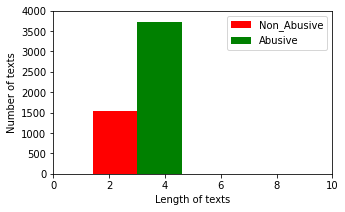

In [ ]:
comments_length_per_class(train_data,'Training')

##Ktrain -BERT


Applying BERT model

In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 71.8 MB/s 
     |████████████████████████████████| 981 kB 59.3 MB/s 
     |████████████████████████████████| 263 kB 60.7 MB/s 
     |████████████████████████████████| 3.8 MB 51.7 MB/s 
     |████████████████████████████████| 1.3 MB 62.5 MB/s 
     |████████████████████████████████| 468 kB 70.4 MB/s 
     |████████████████████████████████| 182 kB 74.1 MB/s 
     |████████████████████████████████| 7.6 MB 55.5 MB/s 
     |████████████████████████████████| 880 kB 60.1 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.10-py3-none-any.whl size=25312982 sha256=5ab996d09ff3d519fb375dd2f27e00d4544fe758ca1dc791c775a3e7dd187686
  Stored in directory: /root/.cache/pip/wheels/9c/1c/1b/6df2db85720b8f5c6ea5e3ae37313cfc656f248abf910b7cfd
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33516 sha256=548a4d233b70660605c525

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
import ktrain
from ktrain import text

In [ ]:
train_data['label'].value_counts()

1    8525
0    6983
Name: label, dtype: int64

In [ ]:
valid_data['label'].value_counts()

1    2834
0    2336
Name: label, dtype: int64

In [ ]:
categories = ['Non_Abusive','Abusive']

In [ ]:
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

X_valid = valid_data['text'].tolist()
y_valid = valid_data['label'].tolist()

X_test = test_data['text'].tolist()
#y_test = test_data['label'].tolist()

In [ ]:
np.unique(y_train)

array([0, 1])

In [ ]:
# 'bert-base-uncased'
# 'bert-base-multilingual-cased'
# 'distilbert-base-uncased'
# 'ai4bharat/indic-bert'
# 'albert-base-v2'
# 'xlm-roberta-base'
# 'xlnet-base-cased'


In [ ]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_valid,y_valid)
#test = trans.preprocess_test(X_test,y_test)

preprocessing train...
language: ml
train sequence lengths:
	mean : 13
	95percentile : 44
	99percentile : 95


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ml
test sequence lengths:
	mean : 13
	95percentile : 43
	99percentile : 90


In [ ]:
model = trans.get_classifier()

Downloading:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
1292/1292 [==============================] - 256s 163ms/step - loss: 0.6756 - accuracy: 0.5599
Epoch 2/10
1292/1292 [==============================] - 207s 160ms/step - loss: 0.5206 - accuracy: 0.7338
Epoch 3/10
1292/1292 [==============================] - 207s 160ms/step - loss: 0.3989 - accuracy: 0.8143
Epoch 4/10
1292/1292 [==============================] - 207s 160ms/step - loss: 0.4850 - accuracy: 0.7517
Epoch 5/10
1292/1292 [==============================] - 207s 161ms/step - loss: 0.7059 - accuracy: 0.5177
Epoch 6/10
1292/1292 [==============================] - 206s 160ms/step - loss: 0.7087 - accuracy: 0.5245
Epoch 7/10
1292/1292 [==============================] - 120s 93ms/step - loss: 1.5086 - accuracy: 0.5142


done.
Visually inspect loss plot and select learning rate associated with falling loss


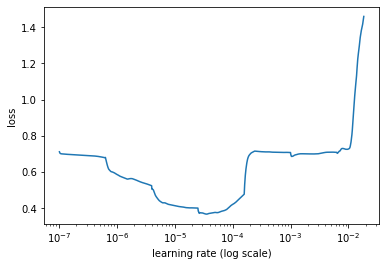

In [ ]:
learner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(y_train),y = y_train)
weight = {i : class_weights[i] for i in range(2)}
weight

{0: 1.1104109981383359, 1: 0.9095601173020528}

In [ ]:
learner.validate(class_names=categories)

162/162 [==============================] - 22s 121ms/step
              precision    recall  f1-score   support

 Non_Abusive       0.45      0.98      0.62      2336
     Abusive       0.52      0.01      0.03      2834

    accuracy                           0.45      5170
   macro avg       0.49      0.50      0.32      5170
weighted avg       0.49      0.45      0.29      5170



array([[2300,   36],
       [2795,   39]])

In [ ]:
learner.save_model('ml_off_m-bert_cw_learner')
# train further here

In [ ]:
learner.load_model('ml_off_xlm-r_learner')

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [ ]:
# Save and load the model
#predictor.save(folder_path+'Transformers_Models'+'/ml_off_xlm-r_predictor')
#predictor = ktrain.load_predictor(folder_path+'Transformers_Models'+'/ml_xlm-r_predictor')

In [ ]:
y_pred = predictor.predict(X_test)
y_pred

In [ ]:
test_data['id'] = test_data.index+1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = y_pred
run

In [ ]:
run['label'].value_counts()

In [ ]:
run['label'].value_counts()

In [ ]:
run.to_csv('malayalam_off_m-bert_cw.csv',index = False)

In [ ]:
%%time
predictor = ktrain.load_predictor('ml_off_indic-bert_cw_predictor')

In [ ]:
vv = predictor.predict(X_valid)

In [ ]:
print(vv)

In [ ]:
tt = pd.DataFrame(valid_data.index+1, columns=['id']) 
tt['label']=vv
tt
tt.to_excel('ml_off_indic-bert_cw_predictor.xlsx', index= False)

In [ ]:
xlmr_val = pd.read_excel('off-ml-xlmr.xlsx')
indic_bert = pd.read_excel('ml_off_indic-bert_predictor.xlsx')
indic_bert_cw = pd.read_excel('ml_off_indic-bert_cw_predictor.xlsx')

In [ ]:
print(classification_report(valid_data['label'], xlmr_val['label']))
print(classification_report(valid_data['label'], indic_bert['label']))
print(classification_report(valid_data['label'], indic_bert_cw['label']))
print(classification_report(valid_data['label'], result['id4']))


In [ ]:
result = pd.DataFrame(columns=['id1', 'id2', 'id3'])
result['id1']=xlmr_val['label']
result['id2']=indic_bert['label']
result['id3'] =indic_bert_cw['label']
result['id4'] = result['id2']
result

In [ ]:
c=0
for i in range(len(valid_data)):
   
    if (result['id1'][i]==result['id2'][i]):
        result['id4'][i] = result['id1'][i]
    elif(result['id1'][i]==result['id3'][i]):
        result['id4'][i] = result['id1'][i]
    elif(result['id2'][i]==result['id3'][i]):
         result['id4'][i] = result['id2'][i]

In [ ]:
result['id1'].value_counts()


In [ ]:
result['id4'].value_counts()

In [ ]:
print(classification_report(valid_data['label'], result['id4']))

##Machine Learning

Applying Machine Learning techniques

In [ ]:
def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

In [ ]:
## TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
#use_idf=True,tokenizer=lambda x: x.split()
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
vectorised_posts = vectorizer.fit_transform(train_data['cleaned'])
vectorized_train_posts = vectorizer.transform(train_data['cleaned'])
vectorized_valid_posts = vectorizer.transform(valid_data['cleaned'])
vectorized_test_posts = vectorizer.transform(test_data['cleaned'])

print("Feature Size: ", vectorized_train_posts.shape[1])
#vectorizer.vocabulary_

In [ ]:
vectorized_valid_posts.shape

In [ ]:
valid_data['label'].value_counts()

In [ ]:
labels = ['Non_Abusive','Abusive']
def actual_label(row):
    return labels[row]

### LR

Logisitic Regression

In [ ]:
# After Tunning
# Optimum C = 100 
lr = LogisticRegression(class_weight='balanced')
lr.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = lr.predict(vectorized_valid_posts)
print_metrices(valid_data['enc_label'],y_pred)

In [ ]:
test_pred = lr.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv('malayalam_off_lr.csv',index = False)

### SVM

Support Vector Machine

In [ ]:
## SVM
from sklearn.svm import SVC
svc =  SVC(kernel='linear' ,random_state=1234,class_weight='balanced',C =5)
svc.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = svc.predict(vectorized_valid_posts)
print_metrices(valid_data['enc_label'],y_pred)

In [ ]:
test_pred = svc.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run['label'].value_counts()

In [ ]:
run.to_csv('malayalam_off_svm.csv',index = False)

### Ensemble Appraoch (Majority Voting)

In [ ]:

LogReg_clf = LogisticRegression(class_weight='balanced')
DTree_clf = DecisionTreeClassifier(class_weight='balanced',)
rt_clf =   RandomForestClassifier(class_weight='balanced')
SVC_clf = SVC(C = 5,class_weight='balanced')


voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf),('RF', rt_clf)], voting='hard')
voting_clf.fit(vectorized_train_posts, train_data['enc_label'])
preds = voting_clf.predict(vectorized_valid_posts)
print_metrices(valid_data['enc_label'], preds)


In [ ]:
test_pred = voting_clf.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run['label'].value_counts()

In [ ]:
run.to_csv('malayalam_off_voting.csv',index = False)

##Deep Learning

Applying Deep Learning techniques

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
print("Tensorflow Version:--",tf.version.VERSION)
print("Keras Version:---",keras.__version__)

###Tokenization

In [ ]:
tokenizer = Tokenizer(num_words = 10000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
tokenizer.fit_on_texts(train_data['text'])  
vocab_size = len(tokenizer.word_index)+1

In [ ]:
print(vocab_size)

In [ ]:
max_len = 50
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(valid_data['text'])
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced'
                                               ,np.unique(train_data['enc_label'])
                                               ,train_data['enc_label'])

weight = {i : class_weights[i] for i in range(2)}

In [ ]:
weight

In [ ]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "ml_off_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000, 100, input_length = max_len),
tf.keras.layers.Conv1D(128, 5, activation='relu'),
tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 32,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(5 , activation='softmax')])

model.summary()


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=15,
    batch_size = 32,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

In [ ]:
# Load the saved model
model = load_model('ml_off_BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)
print_metrices(valid_data['enc_label'],y_pred)


### Test Set Prediction

In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()


In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv('malayalam_off_cnn+bilstm.csv',index = False)

##Pretrained Word Embedding (Fasttext)

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz'))

In [ ]:
tokenizer = Tokenizer(num_words = 40000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
tokenizer.fit_on_texts(train_data['text'])  
word_index = tokenizer.word_index
vocab_size = len(word_index )+1

In [ ]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = vocab_and_vectors.get(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
max_len = 50
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(valid_data['text'])
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(train_data['enc_label']) ,y = train_data['enc_label'])

weight = {i : class_weights[i] for i in range(2)}

#### Model Defination

In [ ]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "prt_ml_off_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300,weights=[embedding_matrix],trainable=False, input_length = max_len),
tf.keras.layers.Conv1D(128, 5, activation='relu'),
tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 128,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(5, activation='softmax')])

model.summary()


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=200,
    batch_size = 32,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

In [ ]:
# Load the saved model
model = load_model('prt_ml_off_BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)
print_metrices(valid_data['enc_label'],y_pred)


In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()


In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 


In [ ]:
run.to_csv('malayalam_off_cnn+bilstm+fasttext.csv',index = False)

##Attention

Applying attention based models

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Add, BatchNormalization, Activation, Dropout

In [ ]:
MAX_FEATURES = 10000
EMBED_SIZE = 128
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_data['cleaned'])
list_tokenized_train = tokenizer.texts_to_sequences(train_data['cleaned'])
list_tokenized_val = tokenizer.texts_to_sequences(valid_data['cleaned'])  
list_tokenized_test = tokenizer.texts_to_sequences(test_data['cleaned'])  
RNN_CELL_SIZE = 100
  
MAX_LEN = 200  
X_train = pad_sequences(list_tokenized_train, maxlen=MAX_LEN)
y_train = train_data['enc_label']
X_val = pad_sequences(list_tokenized_val, maxlen=MAX_LEN)
y_val = valid_data['enc_label']
X_test = pad_sequences(list_tokenized_test, maxlen=MAX_LEN)

In [ ]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
          
        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
          
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [ ]:
sequence_input = Input(shape=(MAX_LEN,), dtype="int32")
embedded_sequences = Embedding(MAX_FEATURES, EMBED_SIZE)(sequence_input)

In [ ]:
#conv = Convolution1D(128,5,activation='relu')(embedded_sequences)
#pol = GlobalMaxPool1D()(conv)

lstm = Bidirectional(LSTM(64, return_sequences = True), name="bi_lstm_0")(embedded_sequences)

# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(64, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)

In [ ]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
context_vector, attention_weights = Attention(20)(lstm, state_h)
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.1)(dense1)
output = Dense(6, activation="softmax")(dropout)
  
model = keras.Model(inputs=sequence_input, outputs=output)

In [ ]:
# summarize layers
print(model.summary())

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=90)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 4
history = model.fit(X_train,y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.10)

In [ ]:
prediction = np.argmax(model.predict(X_val),axis = -1)
print_metrices(valid_data['enc_label'],prediction)

In [ ]:
test_pred = np.argmax(model.predict(X_test), axis=-1).tolist()
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv('malayalam_off_lstm+attn.csv',index = False)

# Kannada Dataset 

Importing the test, validation and test data of kannada code-mix comments

In [ ]:
%%time
train_data = pd.read_csv('/content/kannada_train.csv')
valid_data = pd.read_csv('/content/kannada_val.csv')
test_data = pd.read_csv('/content/kannada_test.csv')

Print the data

In [ ]:
print(train_data)
print(valid_data)
print(test_data)

In [ ]:
train_data['label'].value_counts()

In [ ]:
valid_data['label'].value_counts()

In [ ]:
train_data['enc_label'] = train_data['label']
valid_data['enc_label'] = valid_data['label']

In [ ]:
train_data

In [ ]:
train_data['text'].tolist()

In [ ]:
print("Size of the training data ==> ", train_data.shape)
print("Size of the validation data ==>", valid_data.shape)
print("Size of the Test data ==>", test_data.shape)

## One Hot Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(train_data[['label']]))
encoded_labels .columns = encoder.get_feature_names(['label'])
train_data= pd.concat([train_data, encoded_labels ], axis=1)

In [ ]:
train_data.columns

In [ ]:
train_data

In [ ]:
train_data = train_data.rename(columns={'label_0':'Non_Abusive','label_1':'Abusive'})
train_data

## Cleaning

CLeaning the comments to remove special characters ans URLs

In [ ]:
'''
Text Cleaning
'''
def text_cleaning(row):
  # to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = post.replace('—', ' ')
  # to remove accented characters
  new_text = unicodedata.normalize('NFKD', post).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  # to remove special characters and numbers
  # define the pattern to keep
  #pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
  #text = re.sub(pat, '', new_text)
  #to remove punctuation
  text = ''.join([c for c in text if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower() 
  # Stopword Removing
  tokenizer = ToktokTokenizer()
  # convert sentence into token of words
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  # check in lowercase 
  #t = [token for token in tokens if token.lower() not in stopword_list]
  #text = ' '.join(t) 
  # Stemming
  #t = [stemming.stem(token) for token in tokens ]
  #text = ' '.join(t) 

  return text

In [ ]:
#removing URLs and Punctuations
#train_data['cleaned'] = train_data['tweet'].apply(remove_url)
#Removing punctuations
train_data['cleaned'] = train_data['text'].apply(text_cleaning)
valid_data['cleaned'] = valid_data['text'].apply(text_cleaning)
test_data['cleaned'] = test_data['text'].apply(text_cleaning)


## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(10):
  print("Original Data:===\n",train_data.text[i],"\nCleaned Data:===\n",train_data.cleaned[i],)

In [ ]:
valid_data['cleaned'].shape

## Data Statistics

In [ ]:
train_data.columns

In [ ]:
def char_length(row):
    return len(row.split())

In [ ]:
lables = ['Non_Abusive','Abusive']

# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1.0].cleaned) for word in t.strip().split()]
    print(f"\nClass Name:--> {l} ") 
    print("Number of Words:{}".format(len(word_list))) 
    print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
    print("Maximum post length: {}".format(max(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    

In [ ]:
dataset_statistics(train_data)

## Tweets length per class

In [ ]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['Non_Abusive','Abusive']]
  label = label.values
  comment = dataset['cleaned']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix].split())
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
  labelsplt = ['Non_Abusive','Abusive']
  color = ['red','green']    
  bins = [1,5]   
  plt.figure(figsize=(5,3)) 
  #plt.title ('Tweets Length Distribution Per Class')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 10, 0, 4000])
  plt.xlabel('Length of texts')
  plt.ylabel('Number of texts') 
  plt.legend()
  #plt.savefig(path+'real-fake_no_title.png',dpi = 600,bbox_inches ='tight')
  #plt.grid(True)
  plt.show()

In [ ]:
comments_length_per_class(train_data,'Training')

##Ktrain -BERT


Applying BERT model

In [ ]:
!pip install ktrain

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
import ktrain
from ktrain import text

In [ ]:
train_data['label'].value_counts()

In [ ]:
valid_data['label'].value_counts()

In [ ]:
categories = ['Non_Abusive','Abusive']

In [ ]:
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

X_valid = valid_data['text'].tolist()
y_valid = valid_data['label'].tolist()

X_test = test_data['text'].tolist()
#y_test = test_data['label'].tolist()

In [ ]:
np.unique(y_train)

In [ ]:
# 'bert-base-uncased'
# 'bert-base-multilingual-cased'
# 'distilbert-base-uncased'
# 'ai4bharat/indic-bert'
# 'albert-base-v2'
# 'xlm-roberta-base'
# 'xlnet-base-cased'


In [ ]:
model_name = 'xlm-roberta-base'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

In [ ]:
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_valid,y_valid)
#test = trans.preprocess_test(X_test,y_test)


In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [ ]:
learner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(train_data['label']),y = train_data['label'])

weight = {i : class_weights[i] for i in range(2)}
weight

In [ ]:
learner.fit_onecycle(2e-5,20,class_weight = weight)  # 2e-5

In [ ]:
learner.validate(class_names=categories)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [ ]:
# Save and load the model
predictor.save('ka_indic-bert_predictor')

In [ ]:
predictor = ktrain.load_predictor('ka_xlm-r_predictor')

In [ ]:
y_pred = predictor.predict(X_test)
y_pred

In [ ]:
test_data['id'] = test_data.index+1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = y_pred
run

In [ ]:
run['label'].value_counts()

In [ ]:
run['label'].value_counts()

In [ ]:
run.to_csv('kannada_off_xlm-r_cw.csv',index = False)

##Machine Learning

Applying Machine Learing techniques

In [ ]:
def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

In [ ]:
## TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
#use_idf=True,tokenizer=lambda x: x.split()
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(),ngram_range=(1,2))
vectorised_posts = vectorizer.fit_transform(train_data['cleaned'])
vectorized_train_posts = vectorizer.transform(train_data['cleaned'])
vectorized_valid_posts = vectorizer.transform(valid_data['cleaned'])
vectorized_test_posts = vectorizer.transform(test_data['cleaned'])

print("Feature Size: ", vectorized_train_posts.shape[1])
#vectorizer.vocabulary_

In [ ]:
vectorized_valid_posts.shape

In [ ]:
valid_data['label'].value_counts()

In [ ]:
labels = ['Non_Abusive','Abusive']
def actual_label(row):
    return labels[row]

### LR

Logistic Regression

In [ ]:
# After Tunning
# Optimum C = 100 
lr = LogisticRegression(class_weight='balanced')
lr.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = lr.predict(vectorized_valid_posts)
print_metrices(valid_data['enc_label'],y_pred)

In [ ]:
test_pred = lr.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run['label'].value_counts()

In [ ]:
run.to_csv('kannada_off_lr.csv',index = False)

### SVM

Spport Vector Machine

In [ ]:
## SVM
from sklearn.svm import SVC
svc =  SVC(C = 5, kernel='linear' ,random_state=1234,class_weight='balanced')
svc.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = svc.predict(vectorized_valid_posts)
print_metrices(valid_data['enc_label'],y_pred)

In [ ]:
test_pred = svc.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run['label'].value_counts()

In [ ]:
run.to_csv('kannada_off_svm.csv',index = False)

### Ensemble Appraoch (Majority Voting)

In [ ]:
LogReg_clf = LogisticRegression(class_weight='balanced')
DTree_clf = DecisionTreeClassifier(class_weight='balanced')
rt_clf =   RandomForestClassifier(class_weight='balanced')
SVC_clf = SVC(C = 5,class_weight='balanced')

voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf),('RF', rt_clf)], voting='hard')
voting_clf.fit(vectorized_train_posts, train_data['enc_label'])
preds = voting_clf.predict(vectorized_valid_posts)
print_metrices(valid_data['enc_label'], preds)

In [ ]:
test_pred = voting_clf.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run['label'].value_counts()

In [ ]:
run.to_csv('kannada_off_voting.csv',index = False)

##Deep Learning

Applying Deep Learning techniques

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
print("Tensorflow Version:--",tf.version.VERSION)
print("Keras Version:---",keras.__version__)

###Tokenization

In [ ]:
tokenizer = Tokenizer(num_words = 10000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', split=' ', char_level=False, oov_token='<oov>', document_count=0)
tokenizer.fit_on_texts(train_data['text'])  
vocab_size = len(tokenizer.word_index)+1

In [ ]:
print(vocab_size)

In [ ]:
max_len = 50
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(valid_data['text'])
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight="balanced",classes = np.unique(train_data['enc_label']),y = train_data['enc_label'])

weight = {i : class_weights[i] for i in range(2)}

In [ ]:
weight

In [ ]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "ka_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000, 100, input_length = max_len),
tf.keras.layers.Conv1D(128, 5, activation='relu'),
tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 128,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(6 , activation='softmax')])

model.summary()


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=30,
    batch_size = 32,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

In [ ]:
# Load the saved model
model = load_model('ka_BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)
print_metrices(valid_data['enc_label'],y_pred)


### Test Set Prediction

In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()

In [ ]:

test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run['label'].value_counts()

In [ ]:
run.to_csv('kannada_bilstm.csv',index = False)

##Pretrained Word Embedding (Fasttext)

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.kn.300.vec.gz'))

In [ ]:
tokenizer = Tokenizer(num_words = 10000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
tokenizer.fit_on_texts(train_data['text'])  
word_index = tokenizer.word_index
vocab_size = len(word_index )+1

In [ ]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = vocab_and_vectors.get(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
max_len = 50
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(valid_data['text'])
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight =  'balanced',classes = np.unique(train_data['enc_label']),y = train_data['enc_label'])

weight = {i : class_weights[i] for i in range(2)}

#### Model Definition

In [ ]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "prt_ka_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300,weights=[embedding_matrix],trainable=False, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 128,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(6 , activation='softmax')])

model.summary()


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=200,
    batch_size = 32,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

In [ ]:
# Load the saved model
model = load_model('prt_ka_BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)
print_metrices(valid_data['enc_label'],y_pred)


In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()

In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 


In [ ]:
run.to_csv('kannada_bilstm+fasttext.csv',index = False)

##Attention

Applying attention based models

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Add, BatchNormalization, Activation, Dropout

In [ ]:
MAX_FEATURES = 10000
EMBED_SIZE = 128
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_data['cleaned'])
list_tokenized_train = tokenizer.texts_to_sequences(train_data['cleaned'])
list_tokenized_val = tokenizer.texts_to_sequences(valid_data['cleaned'])  
list_tokenized_test = tokenizer.texts_to_sequences(test_data['cleaned'])  
RNN_CELL_SIZE = 100
  
MAX_LEN = 200  
X_train = pad_sequences(list_tokenized_train, maxlen=MAX_LEN)
y_train = train_data['enc_label']
X_val = pad_sequences(list_tokenized_val, maxlen=MAX_LEN)
y_val = valid_data['enc_label']
X_test = pad_sequences(list_tokenized_test, maxlen=MAX_LEN)

In [ ]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
          
        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
          
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [ ]:
sequence_input = Input(shape=(MAX_LEN,), dtype="int32")
embedded_sequences = Embedding(MAX_FEATURES, EMBED_SIZE)(sequence_input)

In [ ]:
#conv = Convolution1D(128,5,activation='relu')(embedded_sequences)
#pol = GlobalMaxPool1D()(conv)

lstm = Bidirectional(LSTM(64, return_sequences = True), name="bi_lstm_0")(embedded_sequences)

# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(64, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)

In [ ]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
context_vector, attention_weights = Attention(20)(lstm, state_h)
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.1)(dense1)
output = Dense(6, activation="softmax")(dropout)
  
model = keras.Model(inputs=sequence_input, outputs=output)

In [ ]:
# summarize layers
print(model.summary())

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=90)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 4
history = model.fit(X_train,y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.10)

In [ ]:
prediction = np.argmax(model.predict(X_val),axis = -1)
print_metrices(valid_data['enc_label'],prediction)

In [ ]:
test_pred = np.argmax(model.predict(X_test), axis=-1).tolist()
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv('kannada_off_lstm+attn.csv',index = False)

# Telugu Dataset

Importing the test, validation and test data of telugu code-mix comments

In [ ]:
%%time
train_data = pd.read_csv("/content/telugu_train.csv")
valid_data = pd.read_csv("/content/telugu_val.csv")
test_data = pd.read_csv("/content/telugu_test.csv")

In [ ]:
print(train_data)
print(valid_data)
print(test_data)

In [ ]:
train_data['label'].value_counts()

In [ ]:
valid_data['label'].value_counts()

In [ ]:
train_data['enc_label'] = train_data['label']
valid_data['enc_label'] = valid_data['label']

In [ ]:
train_data

In [ ]:
train_data['text'].tolist()

In [ ]:
print("Size of the training data ==> ", train_data.shape)
print("Size of the validation data ==>", valid_data.shape)
print("Size of the Test data ==>", test_data.shape)

## One Hot Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(train_data[['label']]))
encoded_labels .columns = encoder.get_feature_names(['label'])
train_data= pd.concat([train_data, encoded_labels ], axis=1)

In [ ]:
train_data.columns

In [ ]:
train_data

In [ ]:
train_data = train_data.rename(columns={'label_0':'Non_Abusive','label_1':'Abusive'})
train_data

## Cleaning

Cleaning the comments to remove special characters and URLs

In [ ]:
'''
Text Cleaning
'''
def text_cleaning(row):
  # to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = post.replace('—', ' ')
  # to remove accented characters
  new_text = unicodedata.normalize('NFKD', post).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  # to remove special characters and numbers
  # define the pattern to keep
  #pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
  #text = re.sub(pat, '', new_text)
  #to remove punctuation
  text = ''.join([c for c in text if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower() 
  # Stopword Removing
  tokenizer = ToktokTokenizer()
  # convert sentence into token of words
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
 

  return text

In [ ]:
#removing URLs and Punctuations
#train_data['cleaned'] = train_data['tweet'].apply(remove_url)
#Removing punctuations
train_data['cleaned'] = train_data['text'].apply(text_cleaning)
valid_data['cleaned'] = valid_data['text'].apply(text_cleaning)
test_data['cleaned'] = test_data['text'].apply(text_cleaning)


## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(10):
  print("Original Data:===\n",train_data.text[i],"\nCleaned Data:===\n",train_data.cleaned[i],)

In [ ]:
valid_data['cleaned'].shape

## Data Statistics

In [ ]:
def char_length(row):
    return len(row.split())

In [ ]:
train_data.columns

In [ ]:
lables = ['Non_Abusive','Abusive']

# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1.0].cleaned) for word in t.strip().split()]
    print(f"\nClass Name:--> {l} ") 
    print("Number of Words:{}".format(len(word_list))) 
    print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
    print("Maximum post length: {}".format(max(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1.0].cleaned.apply(char_length))))

In [ ]:
dataset_statistics(train_data)

## Tweets length per class

In [ ]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['Non_Abusive','Abusive']]
  label = label.values
  comment = dataset['cleaned']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix].split())
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
  labelsplt = ['Non_Abusive','Abusive']
  color = ['red','green']    
  bins = [1,5]   
  plt.figure(figsize=(5,3)) 
  #plt.title ('Tweets Length Distribution Per Class')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 20, 0, 8000])
  plt.xlabel('Length of texts')
  plt.ylabel('Number of texts') 
  plt.legend()
  #plt.savefig(path+'real-fake_no_title.png',dpi = 600,bbox_inches ='tight')
  #plt.grid(True)
  plt.show()

In [ ]:
comments_length_per_class(train_data,'Training')

##Ktrain -BERT


Applying BERT model

In [ ]:
!pip install ktrain

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [ ]:
import ktrain
from ktrain import text

In [ ]:
train_data['label'].value_counts()

In [ ]:
valid_data['label'].value_counts()

In [ ]:
categories = ['Non_Abusive','Abusive']

In [ ]:
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

X_valid = valid_data['text'].tolist()
y_valid = valid_data['label'].tolist()

X_test = test_data['text'].tolist()
#y_test = test_data['label'].tolist()

In [ ]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

In [ ]:
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_valid,y_valid)
#test = trans.preprocess_test(X_test,y_test)

In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [ ]:
learner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(train_data['label']),y = train_data['label'])
weight = {i : class_weights[i] for i in range(2)}
weight

In [ ]:
learner.fit_onecycle(2e-5,15,class_weight=weight)     #2e-5        

In [ ]:
learner.validate(class_names=categories)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [ ]:
# Save and load the model
predictor.save('tl_offensive_m-bert_cw_predictor')

In [ ]:
predictor = ktrain.load_predictor('tl_offensive_m-bert_predictor')

In [ ]:
y_pred = predictor.predict(X_test)
y_pred

In [ ]:
test_data['id'] = test_data.index+1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = y_pred
run

In [ ]:
run['label'].value_counts()

In [ ]:
run.to_csv('telugu_off_indic-bert_cw.csv',index = False)

##Machine Learning

Applying Machine Learning techniques

In [ ]:
def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

In [ ]:
## TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
#use_idf=True,tokenizer=lambda x: x.split()
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
vectorised_posts = vectorizer.fit_transform(train_data['cleaned'])
vectorized_train_posts = vectorizer.transform(train_data['cleaned'])
vectorized_valid_posts = vectorizer.transform(valid_data['cleaned'])
vectorized_test_posts = vectorizer.transform(test_data['cleaned'])

print("Feature Size: ", vectorized_train_posts.shape[1])
#vectorizer.vocabulary_

In [ ]:
vectorized_valid_posts.shape

In [ ]:
labels = ['Non_Abusive','Abusive']
def actual_label(row):
    return labels[row]

###LR

Logistic Regression

In [ ]:
# After Tunning
# Optimum C = 100 
lr = LogisticRegression(C=10,class_weight='balanced')
lr.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = lr.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

In [ ]:
test_pred = lr.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv('telugu_off_lr.csv',index = False)

###SVM

Support Vector Machine

In [ ]:
## SVM
from sklearn.svm import SVC
svc =  SVC(kernel='linear' C = 5,random_state=1234,class_weight='balanced')
svc.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = svc.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

In [ ]:
test_pred = svc.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv('telugu_off_svm.csv',index = False)

###Ensemble Approach(Majority Voting)

In [ ]:
LogReg_clf = LogisticRegression(class_weight='balanced')
DTree_clf = DecisionTreeClassifier(class_weight='balanced')
rt_clf =   RandomForestClassifier(class_weight='balanced')
SVC_clf = SVC(class_weight='balanced')

voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf),('RF', rt_clf)], voting='hard')
voting_clf.fit(vectorized_train_posts, train_data['enc_label'])
preds = voting_clf.predict(vectorized_valid_posts)

In [ ]:
print_metrices(valid_data['enc_label'],preds)

In [ ]:
test_pred = voting_clf.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv('telugu_off_voting.csv',index = False)

##Deep Learning

Applying Deep Learning techniques

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
print("Tensorflow Version:--",tf.version.VERSION)
print("Keras Version:---",keras.__version__)

###Tokenization

In [ ]:
tokenizer = Tokenizer(num_words = 20000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
tokenizer.fit_on_texts(train_data['text'])  
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [ ]:
print(vocab_size)

In [ ]:
max_len = 50
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(valid_data['text'])
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(train_data['enc_label']),y = train_data['enc_label'])

weight = {i : class_weights[i] for i in range(2)}

In [ ]:
weight

In [ ]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "tl_off_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 100, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 100,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(6 , activation='softmax')])

model.summary()


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=15,
    batch_size = 64,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

In [ ]:
# Load the saved model
model = load_model('tl_off_BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)

print("F1-Score:",f1_score(valid_data['enc_label'],y_pred,average = 'weighted')*100)
print("Accuracy:",accuracy_score(valid_data['enc_label'],y_pred)*100)

In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
print_metrices(valid_data['enc_label'],y_pred)

### Test Set Prediction

In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()
test_pred

In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv('telugu_bilstm.csv',index = False)

##Pretrained Embedding

In [ ]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ta.300.vec.gz'))

In [ ]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = vocab_and_vectors.get(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

###Model Defination

In [ ]:
num_classes = 2
accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "prt_tl-off-BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300,weights=[embedding_matrix],trainable=False, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 200,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(6 , activation='softmax')])

model.summary()

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=50,
    batch_size = 64,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

In [ ]:
# Load the saved model
model = load_model('prt_tl-off-BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)
print_metrices(y_pred,valid_data['enc_label'])


In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()
test_pred

In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv('telugu_cnn+bilstm+fasttext.csv',index = False)

##Attention

Applying attention based models

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Add, BatchNormalization, Activation, Dropout

In [ ]:
MAX_FEATURES = 10000
EMBED_SIZE = 128
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_data['cleaned'])
list_tokenized_train = tokenizer.texts_to_sequences(train_data['cleaned'])
list_tokenized_val = tokenizer.texts_to_sequences(valid_data['cleaned'])  
list_tokenized_test = tokenizer.texts_to_sequences(test_data['cleaned'])  
RNN_CELL_SIZE = 100
  
MAX_LEN = 200  
X_train = pad_sequences(list_tokenized_train, maxlen=MAX_LEN)
y_train = train_data['enc_label']
X_val = pad_sequences(list_tokenized_val, maxlen=MAX_LEN)
y_val = valid_data['enc_label']
X_test = pad_sequences(list_tokenized_test, maxlen=MAX_LEN)

In [ ]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
          
        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
          
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [ ]:
sequence_input = Input(shape=(MAX_LEN,), dtype="int32")
embedded_sequences = Embedding(MAX_FEATURES, EMBED_SIZE)(sequence_input)

In [ ]:
#conv = Convolution1D(128,5,activation='relu')(embedded_sequences)
#pol = GlobalMaxPool1D()(conv)

lstm = Bidirectional(LSTM(64, return_sequences = True), name="bi_lstm_0")(embedded_sequences)

# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(64, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)

In [ ]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
context_vector, attention_weights = Attention(20)(lstm, state_h)
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.1)(dense1)
output = Dense(6, activation="softmax")(dropout)
  
model = keras.Model(inputs=sequence_input, outputs=output)

In [ ]:
# summarize layers
print(model.summary())

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=90)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 4
history = model.fit(X_train,y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.10)

In [ ]:
prediction = np.argmax(model.predict(X_val),axis = -1)
print_metrices(valid_data['enc_label'],prediction)

In [ ]:
test_pred = np.argmax(model.predict(X_test), axis=-1).tolist()
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv('telugu_off_lstm+attn.csv',index = False)

# Data Analysis & Results 

1) We have appied various machine learning models

2) Then we applied some deep learning models.

3) Then we applied some transformers based models.

4) Accuaracy in case of classical machine learning models was better than deep learning models and transformers based model, maybe due to small dataset.

# Ethics & Privacy

   - Data Permission   
     Comments have been sourced from a popular social media platform - ShareChat. 
       
       
   - Data Discrepancy and biases  

     We also ensured that MACD has less code-mixing to focus primarily on Indic languages and vocabulary by removing comments containing higher proportion of Roman characters. To mitigate the presence of user bias in the dataset, we threshold the number of comments fetched for each user by 500 while preparing the dataset.

          
   - Data Privacy  
     
     Personally Identifiable Information (PII) like names, phone numbers, email addresses, social media handles etc. present in the posts were removed to protect user privacy. The identifier of posts, comments and users were randomized for maintaining anonymity. Emojis were preserved for capturing social media nuances.  

# Conclusion & Discussion

Detection of abusive content is an important problem for ensuring safe and healthy social media interactions.

In this work, we have described and analyzed the system’s performance. Initially, SVM, LR, LSTM, LSTM+Attention models have employed with tf-idf and word embedding features. Results indicate that ML ensemble achieved higher accuracy than DL methods. However, the outcomes are not promising for the
available datasets. Code-mixing of multilingual texts might be a reason behind this. We applied transformer-based models to overcome this situation, which provides an astonishing rise in accuracy than ML and DL-based methods. In future, the idea of ensemble technique could be adopted on transformer-based models to investigate the system’s overall performance.